In [6]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Crime Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .getOrCreate()

# Read the CSV file from HDFS
df = spark.read.csv("hdfs://localhost:9000/crime_data/cleaned_crime_data/part-00000-30a3d089-9201-472f-830c-c55e66fa4738-c000.csv", header=True, inferSchema=True)

# Show first 10 rows
df.show(n=10, truncate=False)
df.count()

+---------+----------+----------+--------+----+----------+-----------+--------+------+----------------------------------------+-------------------+--------+--------+------------+---------+--------------------------------------------+--------------+-----------+------+------------+--------+--------+-------------------+-------+---------+
|DR_NO    |Date Rptd |DATE OCC  |TIME OCC|AREA|AREA NAME |Rpt Dist No|Part 1-2|Crm Cd|Crm Cd Desc                             |Mocodes            |Vict Age|Vict Sex|Vict Descent|Premis Cd|Premis Desc                                 |Weapon Used Cd|Weapon Desc|Status|Status Desc |Crm Cd 1|Crm Cd 2|LOCATION           |LAT    |LON      |
+---------+----------+----------+--------+----+----------+-----------+--------+------+----------------------------------------+-------------------+--------+--------+------------+---------+--------------------------------------------+--------------+-----------+------+------------+--------+--------+-------------------+-------+

1005199

In [3]:
print(f"Total number of records: {df.count()}")


Total number of records: 1005199


In [7]:
from pyspark.sql.functions import year, col

# Add a Year column based on DATE OCC
df = df.withColumn("Year", year(col("DATE OCC")))

# Create a fresh temporary view
df.createOrReplaceTempView("crime_data")
df.show()

+---------+----------+----------+--------+----+-----------+-----------+--------+------+--------------------+-------------------+--------+--------+------------+---------+--------------------+--------------+-----------+------+------------+--------+--------+-------------------+-------+---------+----+
|    DR_NO| Date Rptd|  DATE OCC|TIME OCC|AREA|  AREA NAME|Rpt Dist No|Part 1-2|Crm Cd|         Crm Cd Desc|            Mocodes|Vict Age|Vict Sex|Vict Descent|Premis Cd|         Premis Desc|Weapon Used Cd|Weapon Desc|Status| Status Desc|Crm Cd 1|Crm Cd 2|           LOCATION|    LAT|      LON|Year|
+---------+----------+----------+--------+----+-----------+-----------+--------+------+--------------------+-------------------+--------+--------+------------+---------+--------------------+--------------+-----------+------+------------+--------+--------+-------------------+-------+---------+----+
|190326475|2020-03-01|2020-03-01|    2130|   7|   WILSHIRE|        784|       1|   510|    VEHICLE - ST

In [6]:
# Check PySpark version
import pyspark
print("PySpark version:", pyspark.__version__)
print("Apache Spark version:", spark.version)


PySpark version: 3.4.4
Apache Spark version: 3.4.4


In [8]:
# Query to analyze crime counts per year
crime_trend = spark.sql("""
    SELECT 
        YEAR(`DATE OCC`) AS Year,
        COUNT(*) AS Total_Crimes
    FROM crime_data
    GROUP BY YEAR(`DATE OCC`)
    ORDER BY Year
""")

# Show result
crime_trend.show()


+----+------------+
|Year|Total_Crimes|
+----+------------+
|2020|      199847|
|2021|      209876|
|2022|      235258|
|2023|      232348|
|2024|      127572|
|2025|         298|
+----+------------+



In [8]:
pip install setuptools


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 12.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: C:\Record Realm\Empire Repo\crime_data_analysis_envi\crime_env\Scripts\python.exe -m pip install --upgrade pip


In [5]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.5 MB 10.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.5 MB 10.9 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.5 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -------------- ------------------------- 4.5/12.6 MB 24.5 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.6 MB 23.9 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 22.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: C:\Record Realm\Empire Repo\crime_data_analysis_envi\crime_env\Scripts\python.exe -m pip install --upgrade pip


In [9]:
# Convert Spark DataFrame to Pandas
crime_trend_pd = crime_trend.toPandas()


In [9]:
pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------------------- ---------------- 4.7/8.1 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 22.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 38.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: C:\Record Realm\Empire Repo\crime_data_analysis_envi\crime_env\Scripts\python.exe -m pip install --upgrade pip


In [10]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Record Realm\Empire Repo\crime_data_analysis_envi\crime_env\Scripts\python.exe -m pip install --upgrade pip


<span style="font-size:20px"><b>Visualize overall crime trends from 2020 to the 2025</b></span>


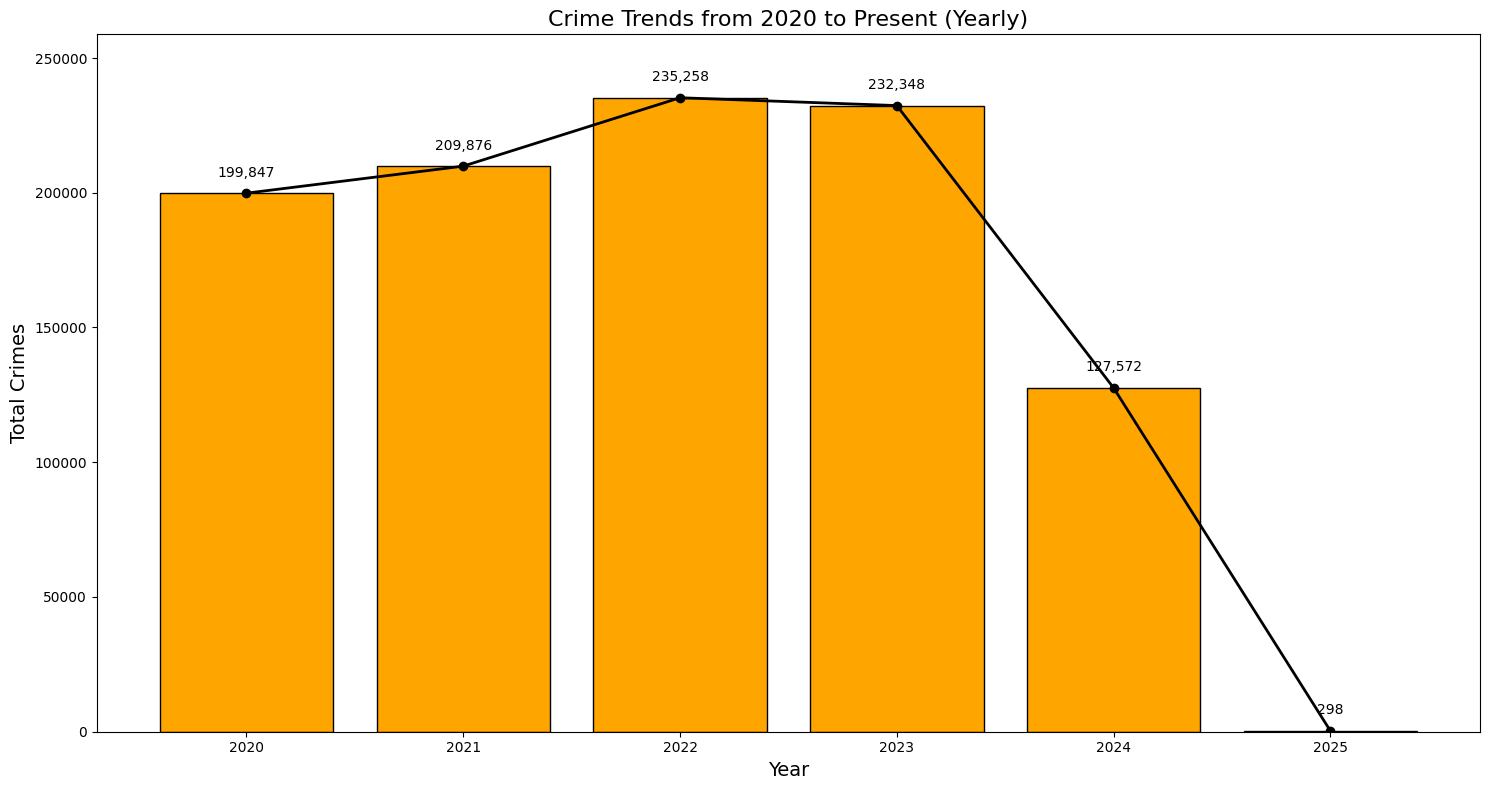

In [10]:
import matplotlib.pyplot as plt

# Sort the data by Year
crime_trend_pd = crime_trend_pd.sort_values(by='Year')

# Create figure
plt.figure(figsize=(15, 8))

# Bar chart
bars = plt.bar(crime_trend_pd['Year'], crime_trend_pd['Total_Crimes'], color='orange', edgecolor='black')

# Line chart on top of bars
plt.plot(crime_trend_pd['Year'], crime_trend_pd['Total_Crimes'], color='black', marker='o', linewidth=2)

# Annotate each point with crime count
for x, y in zip(crime_trend_pd['Year'], crime_trend_pd['Total_Crimes']):
    plt.text(x, y + 5000, f'{y:,}', ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Crime Trends from 2020 to Present (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)

# Optional: set y-axis limit if needed
plt.ylim(0, crime_trend_pd['Total_Crimes'].max() * 1.1)

# Show plot
plt.tight_layout()
plt.show()


In [11]:
from pyspark.sql.functions import month

# Add the Month column to the existing df
df = df.withColumn("Month", month("DATE OCC"))

#df.show(n=10, truncate=False)
df.select("DATE OCC", "Year", "Month").show(10)

+----------+----+-----+
|  DATE OCC|Year|Month|
+----------+----+-----+
|2020-03-01|2020|    3|
|2020-02-08|2020|    2|
|2020-11-04|2020|   11|
|2020-03-10|2020|    3|
|2020-09-09|2020|    9|
|2020-05-02|2020|    5|
|2020-07-07|2020|    7|
|2020-03-27|2020|    3|
|2020-07-30|2020|    7|
|2020-12-03|2020|   12|
+----------+----+-----+
only showing top 10 rows



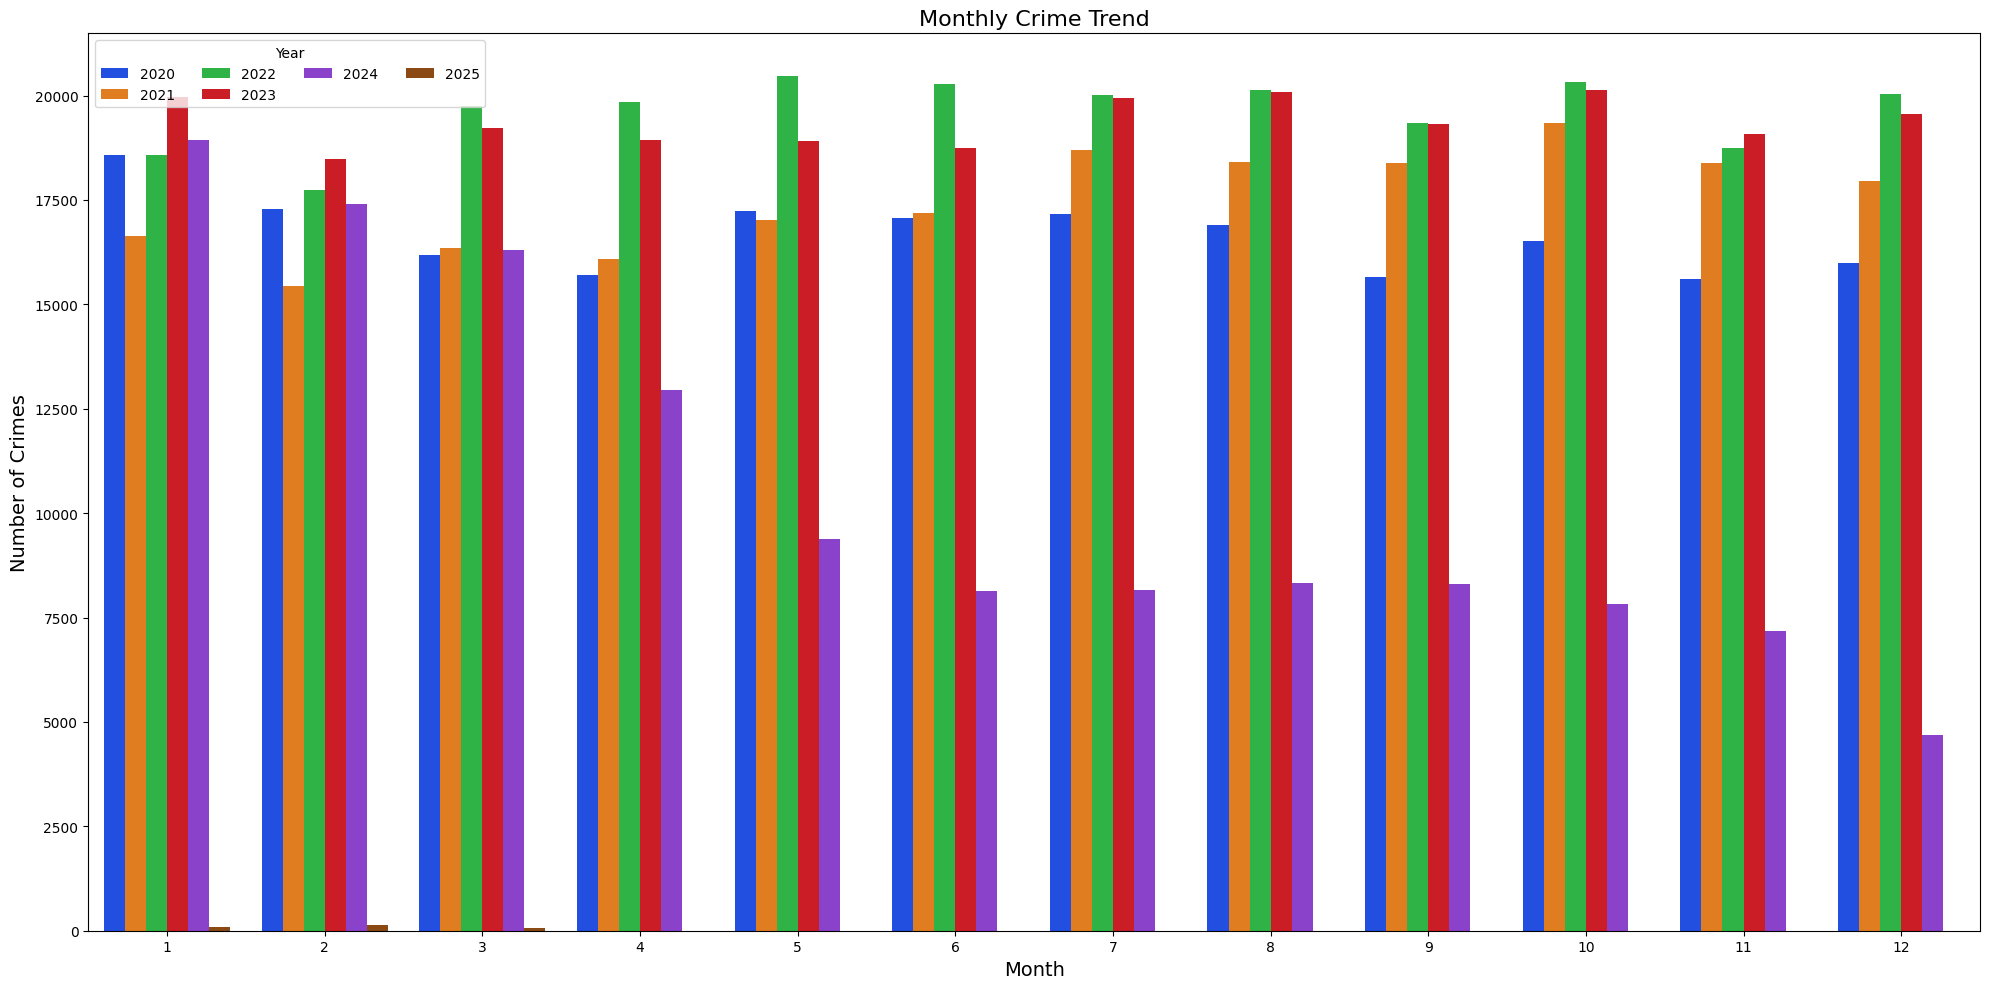

In [12]:
#Converted the updated Spark DataFrame to Pandas for plotting
crime_data_pd = df.select("Year", "Month").toPandas()
import seaborn as sns

#Plotting a grouped bar chart to show monthly crime counts, with bars grouped by `Year`.
plt.figure(figsize=(20, 10))
sns.countplot(data=crime_data_pd, x='Month', hue='Year', palette='bright')
plt.title('Monthly Crime Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.legend(title="Year", ncol=4)
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Analyze and visualize seasonal patterns in crime data</b></span>

Descriptive Statistics for Monthly Crimes:
count       12.000000
mean     83766.583333
std       3966.633412
min      78224.000000
25%      81291.000000
50%      83684.000000
75%      84718.500000
max      92776.000000
dtype: float64


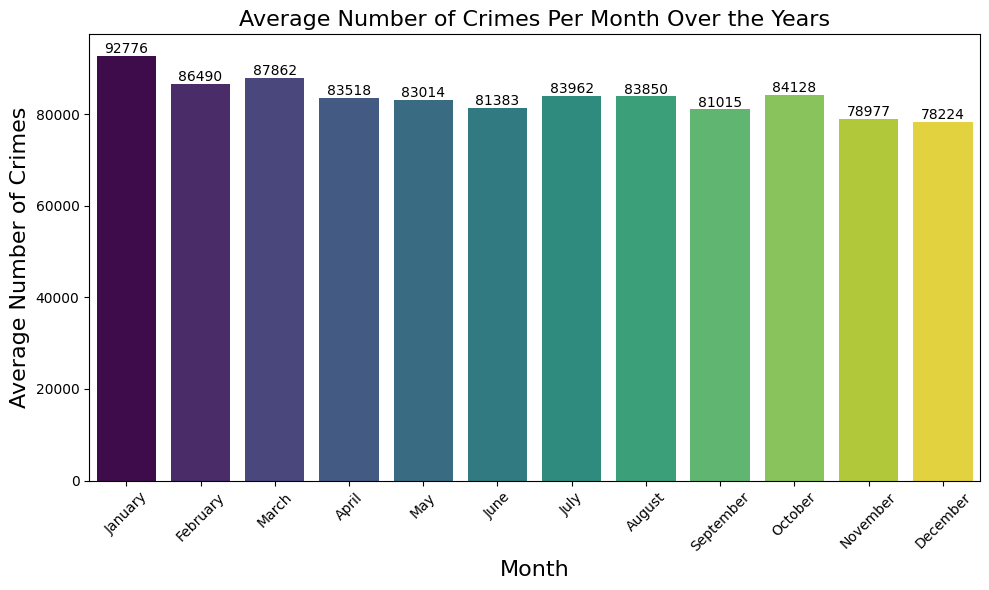

In [13]:
# Group the crime data by Month and count the number of crimes for each
monthly_avg = crime_data_pd.groupby('Month').size()

# Display basic statistical summary of monthly crime counts
print("Descriptive Statistics for Monthly Crimes:")
print(monthly_avg.describe())

# Plot the average number of crimes per month using a bar chart
plt.figure(figsize=(10, 6))

# Create the bar plot with month on X-axis and crime count on Y-axis
# 'viridis' palette gives a visually pleasing gradient of color
ax = sns.barplot(
    data=monthly_avg.reset_index(),
    x='Month',
    y=0,
    hue='Month',             # Tell Seaborn to color based on Month
    palette='viridis',
    legend=False             # Hide the auto-generated legend
)


# Add title and axis labels
plt.title('Average Number of Crimes Per Month Over the Years', fontsize=16)
plt.ylabel('Average Number of Crimes', fontsize=16)
plt.xlabel('Month', fontsize=16)

# Replace numeric month ticks with full month names for better readability
plt.xticks(
    ticks=range(12),
    labels=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    rotation=45
)

# Annotate each bar with its height (i.e., crime count value)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Identify the most common type of crime and its trends over time</b></span>

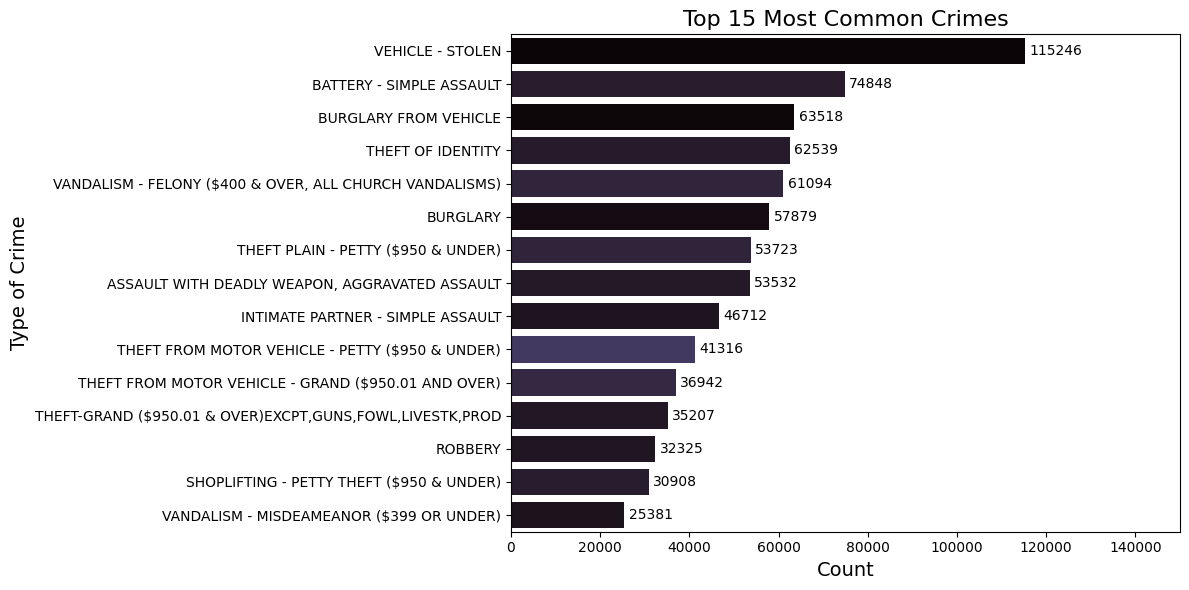

In [14]:
# Plot the Top 15 Most Common Crime Types
crime_data_pd = df.select("Crm Cd Desc", "Year", "Month").toPandas()

plt.figure(figsize=(12, 6))

# Get top 15 most frequent crime types using value_counts()
top_crimes = crime_data_pd['Crm Cd Desc'].value_counts().nlargest(15)

# Create a horizontal bar plot of those top crime descriptions
crime_plot = sns.countplot(
    data=crime_data_pd,
    y='Crm Cd Desc',
    order=top_crimes.index,
    hue='Crm Cd Desc',     # use same column for color mapping
    palette='mako',
    legend=False           # hide the redundant legend
)

# Add chart title and axis labels
plt.title('Top 15 Most Common Crimes', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Type of Crime', fontsize=14)
plt.xlim(0, 150000)  # Set x-axis range for visual balance

# Annotate bars with actual count values
for bar in crime_plot.patches:
    plt.text(
        bar.get_width() + 1000,  # Slightly offset from bar edge
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


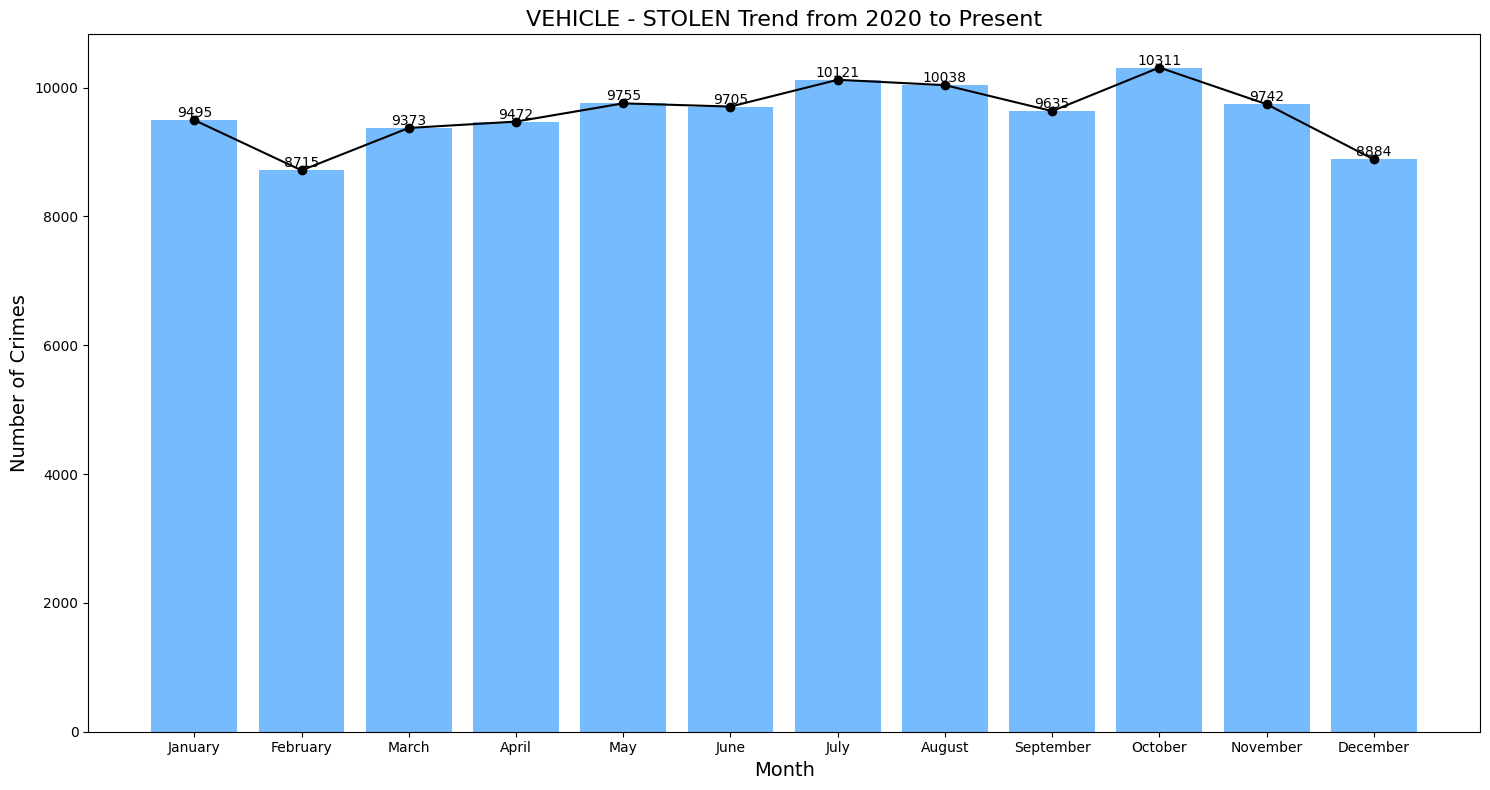

In [15]:
import calendar

# Identify the most frequent crime type
top_crime = crime_data_pd['Crm Cd Desc'].value_counts().index[0]

# Filter data for only the top crime type
filtered_data = crime_data_pd[crime_data_pd['Crm Cd Desc'] == top_crime]

# Group by month and count number of cases
monthly_trend = filtered_data.groupby('Month').size().reset_index(name='Counts')

# Sort by month to maintain correct order
monthly_trend.sort_values('Month', inplace=True)

# Convert numeric month to full month name
monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

# Plot the monthly trend using a bar + line combo
plt.figure(figsize=(15, 8))

plt.bar(monthly_trend['Month'], monthly_trend['Counts'], color='xkcd:sky blue')
plt.plot(monthly_trend['Month'], monthly_trend['Counts'], color='black', marker='o')

# Annotate each bar with count value
for x, y in zip(monthly_trend['Month'], monthly_trend['Counts']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Add chart title and axis labels
plt.title(f'{top_crime} Trend from 2020 to Present', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

plt.tight_layout()
plt.show()


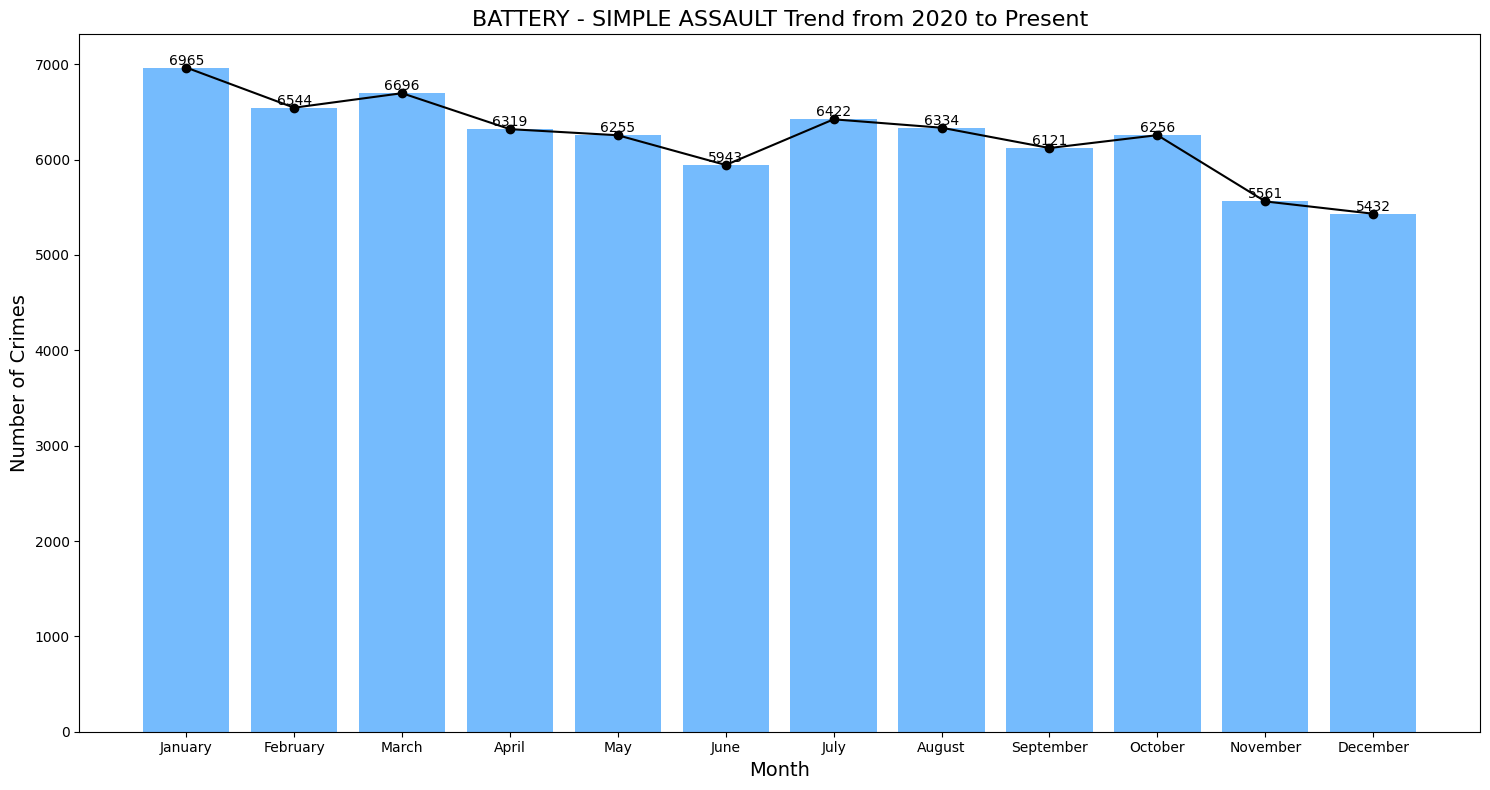

In [16]:
import calendar
# monthly crime trend over the years for BATTRY -SIMPLE ASSAULT crime
# Identify the most frequent crime type
top_crime = crime_data_pd['Crm Cd Desc'].value_counts().index[1]

# Filter data for only the top crime type
filtered_data = crime_data_pd[crime_data_pd['Crm Cd Desc'] == top_crime]

# Group by month and count number of cases
monthly_trend = filtered_data.groupby('Month').size().reset_index(name='Counts')

# Sort by month to maintain correct order
monthly_trend.sort_values('Month', inplace=True)

# Convert numeric month to full month name
monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

# Plot the monthly trend using a bar + line combo
plt.figure(figsize=(15, 8))

plt.bar(monthly_trend['Month'], monthly_trend['Counts'], color='xkcd:sky blue')
plt.plot(monthly_trend['Month'], monthly_trend['Counts'], color='black', marker='o')

# Annotate each bar with count value
for x, y in zip(monthly_trend['Month'], monthly_trend['Counts']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Add chart title and axis labels
plt.title(f'{top_crime} Trend from 2020 to Present', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

plt.tight_layout()
plt.show()


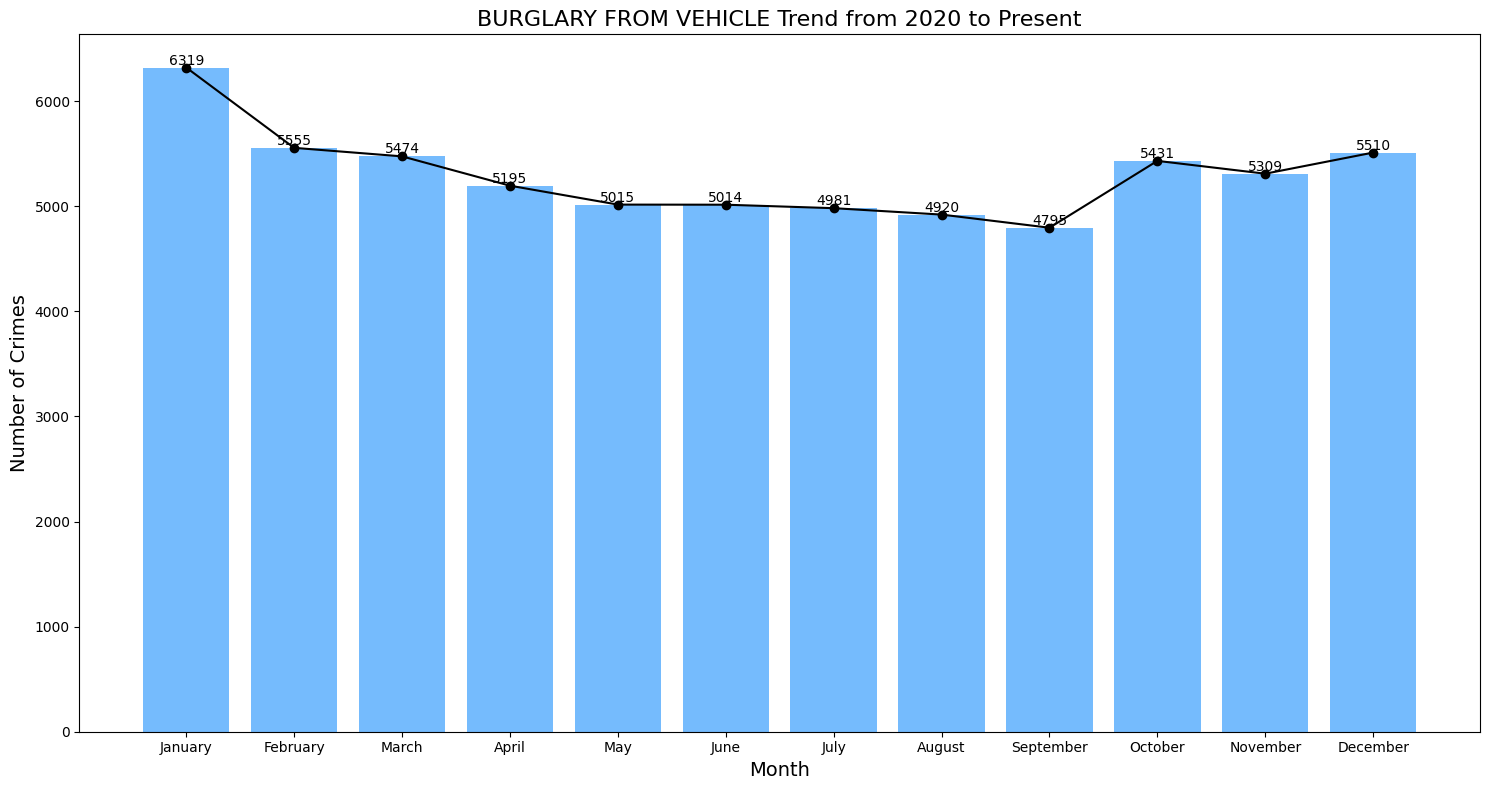

In [17]:
import calendar
# monthly crime trend over the years for BURGLARY FROM VEHICLE crime
# Identify the most frequent crime type
top_crime = crime_data_pd['Crm Cd Desc'].value_counts().index[2]

# Filter data for only the top crime type
filtered_data = crime_data_pd[crime_data_pd['Crm Cd Desc'] == top_crime]

# Group by month and count number of cases
monthly_trend = filtered_data.groupby('Month').size().reset_index(name='Counts')

# Sort by month to maintain correct order
monthly_trend.sort_values('Month', inplace=True)

# Convert numeric month to full month name
monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

# Plot the monthly trend using a bar + line combo
plt.figure(figsize=(15, 8))

plt.bar(monthly_trend['Month'], monthly_trend['Counts'], color='xkcd:sky blue')
plt.plot(monthly_trend['Month'], monthly_trend['Counts'], color='black', marker='o')

# Annotate each bar with count value
for x, y in zip(monthly_trend['Month'], monthly_trend['Counts']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Add chart title and axis labels
plt.title(f'{top_crime} Trend from 2020 to Present', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

plt.tight_layout()
plt.show()


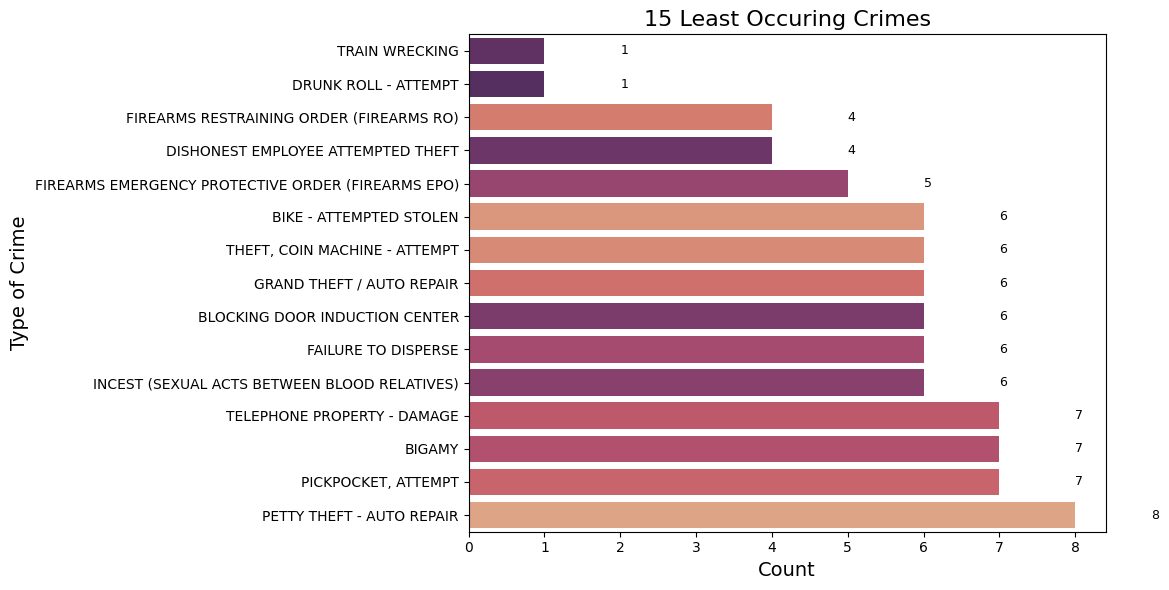

In [18]:
plt.figure(figsize=(12, 6))

# Get 15 least frequent crime types
least_crimes = crime_data_pd['Crm Cd Desc'].value_counts().nsmallest(15)

# Create a horizontal bar plot
crime_plot = sns.countplot(
    data=crime_data_pd[crime_data_pd['Crm Cd Desc'].isin(least_crimes.index)],
    y='Crm Cd Desc',
    order=least_crimes.index,
    hue='Crm Cd Desc',   # use same column for color mapping
    palette='flare',
    legend=False
)

# Add chart title and axis labels
plt.title('15 Least Occuring Crimes', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Type of Crime', fontsize=14)

# Annotate bars with actual count values
for bar in crime_plot.patches:
    plt.text(
        bar.get_width() + 1,  # slight offset
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()


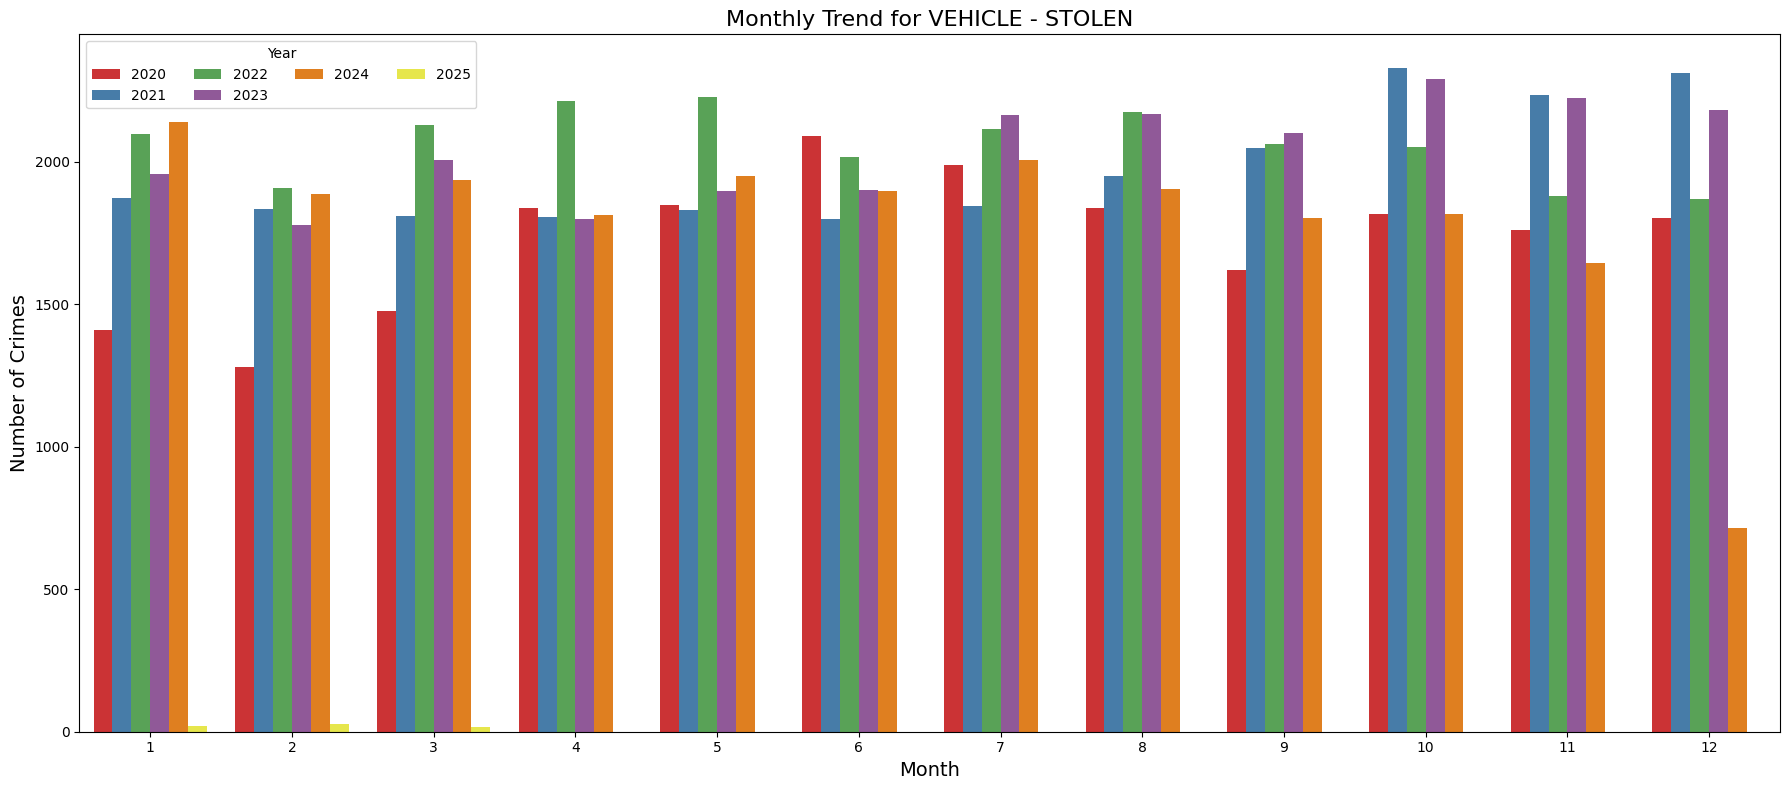

In [19]:
# Get the most common crime type (e.g., "VEHICLE - STOLEN")
top_crime = crime_data_pd['Crm Cd Desc'].value_counts().index[0]

# Filter data for only that top crime type
filtered_data = crime_data_pd[crime_data_pd['Crm Cd Desc'] == top_crime]

# Create a grouped bar plot: crime counts by Month, split by Year
plt.figure(figsize=(18, 8))
sns.countplot(
    data=filtered_data,
    x='Month',
    hue='Year',
    palette='Set1'  # Yellow-Orange-Brown gradient
)

# Add title and labels
plt.title(f'Monthly Trend for {top_crime}', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

# Format legend and layout
plt.legend(title='Year', ncol=4)
plt.tight_layout()

# Show the plot
plt.show()


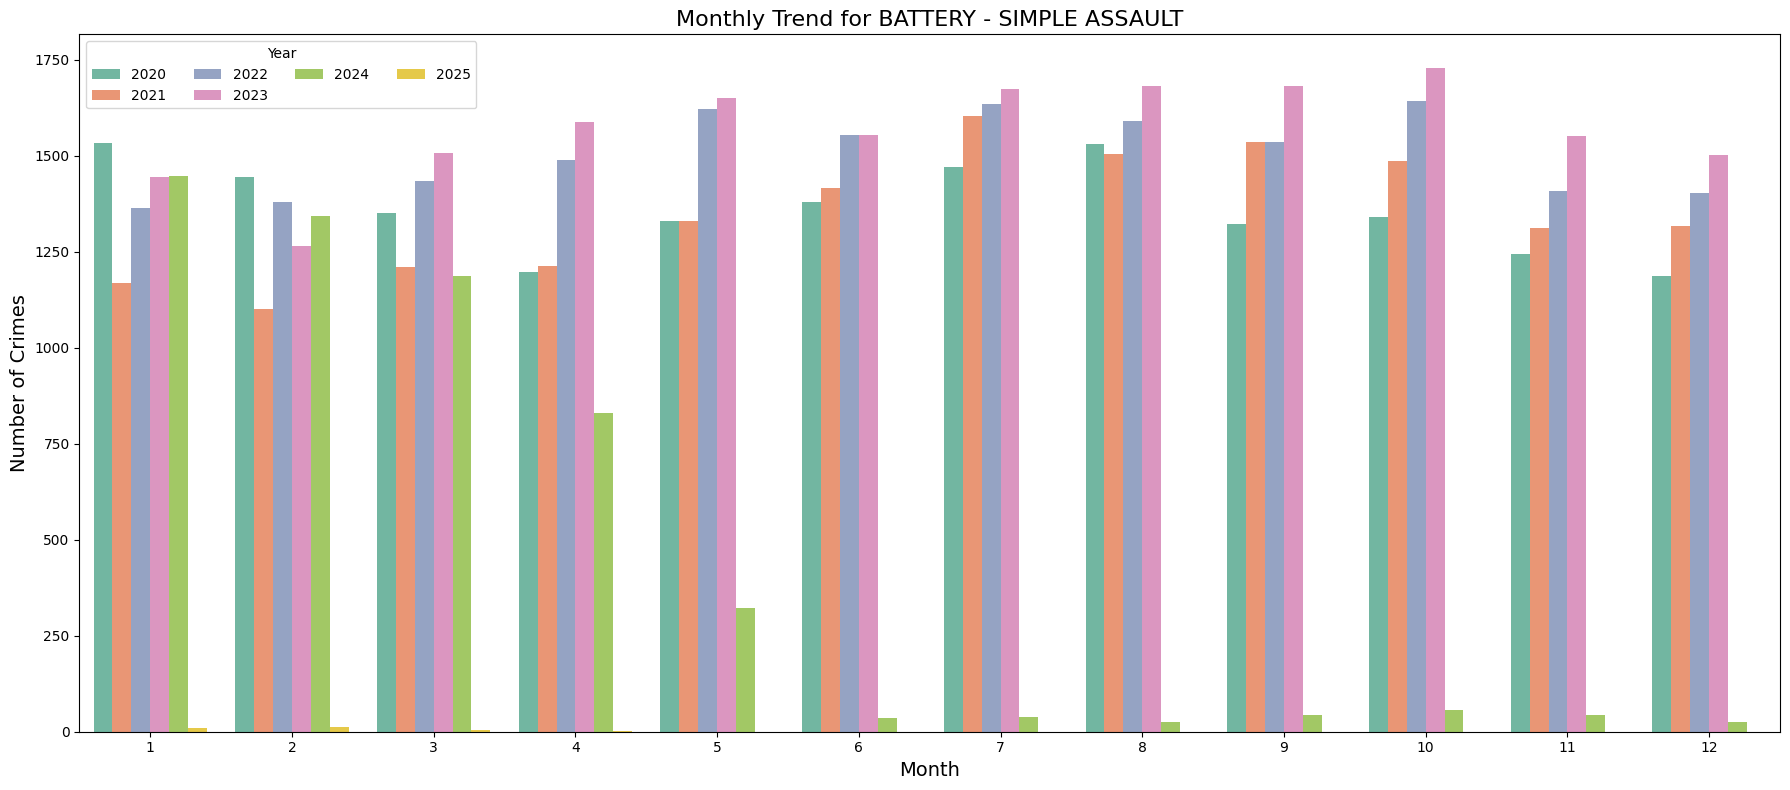

In [20]:
# Get the most common crime type (e.g., "VEHICLE - STOLEN")
top_crime = crime_data_pd['Crm Cd Desc'].value_counts().index[1]

# Filter data for only that top crime type
filtered_data = crime_data_pd[crime_data_pd['Crm Cd Desc'] == top_crime]

# Create a grouped bar plot: crime counts by Month, split by Year
plt.figure(figsize=(18, 8))
sns.countplot(
    data=filtered_data,
    x='Month',
    hue='Year',
    palette='Set2'  # Yellow-Orange-Brown gradient
)

# Add title and labels
plt.title(f'Monthly Trend for {top_crime}', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

# Format legend and layout
plt.legend(title='Year', ncol=4)
plt.tight_layout()

# Show the plot
plt.show()


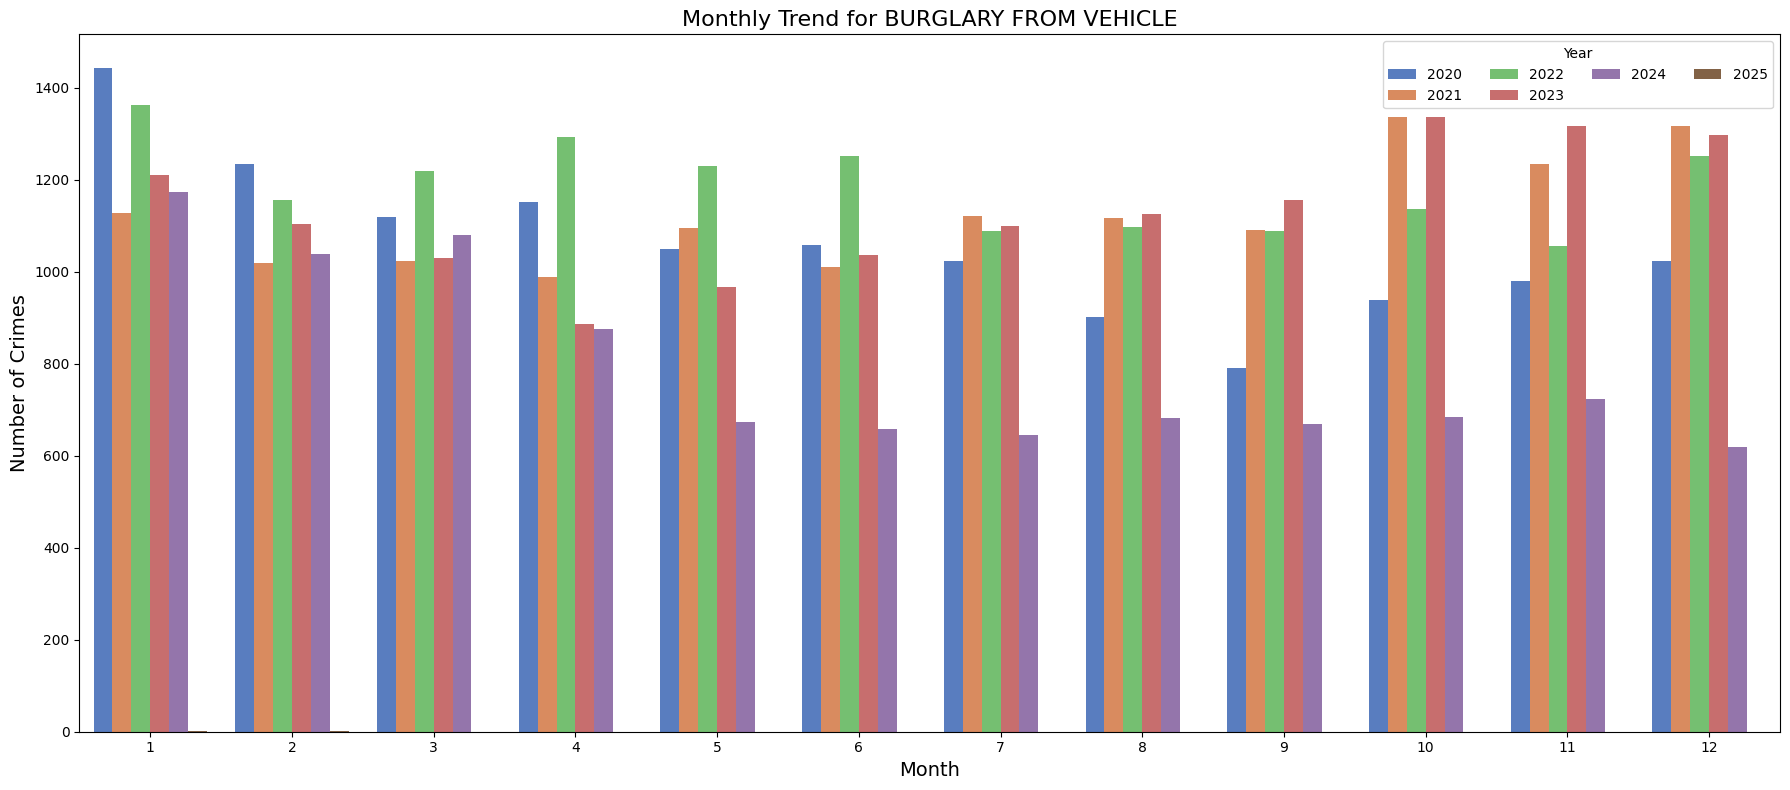

In [21]:
# Get the most common crime type (e.g., "VEHICLE - STOLEN")
top_crime = crime_data_pd['Crm Cd Desc'].value_counts().index[2]

# Filter data for only that top crime type
filtered_data = crime_data_pd[crime_data_pd['Crm Cd Desc'] == top_crime]

# Create a grouped bar plot: crime counts by Month, split by Year
plt.figure(figsize=(18, 8))
sns.countplot(
    data=filtered_data,
    x='Month',
    hue='Year',
    palette='muted'  # Yellow-Orange-Brown gradient
)

# Add title and labels
plt.title(f'Monthly Trend for {top_crime}', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

# Format legend and layout
plt.legend(title='Year', ncol=4)
plt.tight_layout()

# Show the plot
plt.show()


<span style="font-size:20px"><b>Investigate if there are any notable differences in crime rates between regions or cities</b></span>

<span style="font-size:20px"><b>Crime Count by Area</b> <br>
This cell groups the dataset by police area and counts the number of crime incidents in each. The results are visualized using a bar chart to show which areas have higher or lower crime volumes.</span>

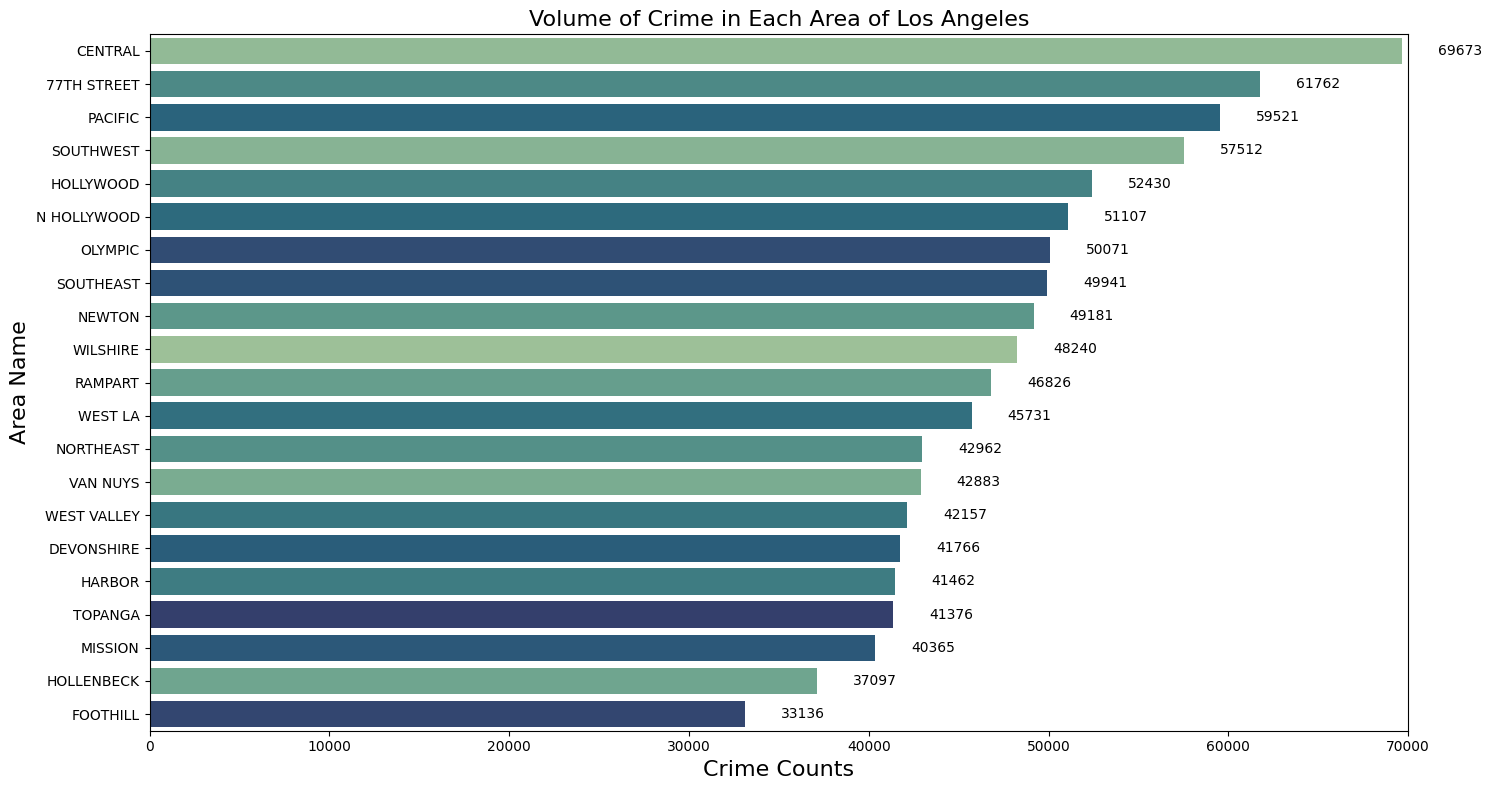

In [22]:
crime_data_pd = df.select("AREA NAME", "Year", "Month").toPandas()
# Analyze crime distribution across LAPD areas
plt.figure(figsize=(15, 8))

# Order AREA NAMEs by descending crime count
order = crime_data_pd['AREA NAME'].value_counts().index

# Horizontal bar plot of crime volume by region
sns.countplot(
    y='AREA NAME',                 
    data=crime_data_pd,            
    order=order,                   
    hue='AREA NAME',               # Add hue to enable color mapping
    palette='crest',              
    legend=False                   # Hide the redundant legend
)

# Axis labels and title
plt.xlabel('Crime Counts', fontsize=16)
plt.ylabel('Area Name', fontsize=16)
plt.title('Volume of Crime in Each Area of Los Angeles', fontsize=16)
plt.xlim(0, 70000)

# Annotate each bar with the actual count value
for bar in plt.gca().patches:
    plt.text(
        bar.get_width() + 2000,  # small offset for readability
        bar.get_y() + bar.get_height() / 2,
        str(int(bar.get_width())),
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [23]:
# Calculate crime counts per AREA NAME
area_crime_counts = crime_data_pd['AREA NAME'].value_counts()

# Generate descriptive statistics for those counts
# This will include count, mean, std dev, min, max, quartiles, etc.
statistics = area_crime_counts.describe()

# Step 3: Display the statistics
print("Descriptive Statistics for Crime Volume by Area Name:")
print(statistics)


Descriptive Statistics for Crime Volume by Area Name:
count       21.000000
mean     47866.619048
std       8765.163760
min      33136.000000
25%      41766.000000
50%      46826.000000
75%      51107.000000
max      69673.000000
Name: count, dtype: float64


<span style="font-size:20px"><b>Analyze the relationship between the day of the week and the frequency of certain types of crimes.</b></span>

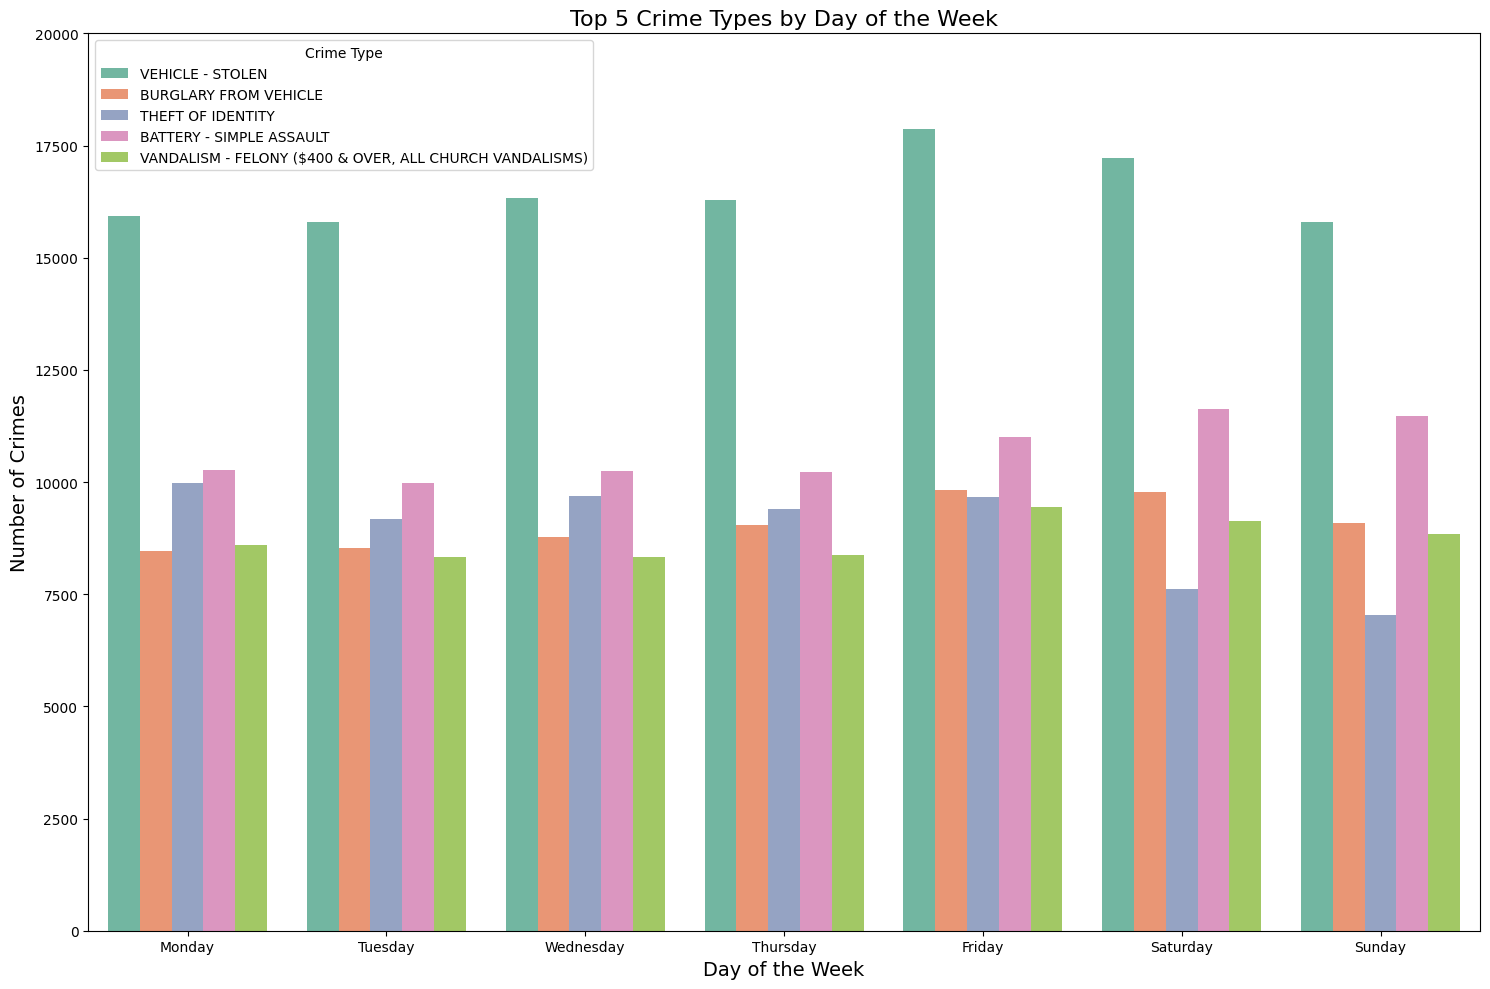

In [24]:
import pandas as pd
crime_data_pd = df.select("Crm Cd Desc", "DATE OCC", "TIME OCC", "AREA NAME", "Year", "Month").toPandas()

# Combine 'DATE OCC' and 'TIME OCC' to form a full datetime
# Ensure TIME OCC is 4-digit format (e.g., 2130 -> 21:30)
crime_data_pd['TIME OCC'] = crime_data_pd['TIME OCC'].apply(lambda x: f"{int(x):04d}")
crime_data_pd['DateTime_OCC'] = pd.to_datetime(crime_data_pd['DATE OCC'].astype(str) + ' ' + crime_data_pd['TIME OCC'].str[:2] + ':' + crime_data_pd['TIME OCC'].str[2:])

# Extract day of the week
crime_data_pd['DayOfWeek'] = crime_data_pd['DateTime_OCC'].dt.day_name()

# Get top 5 most frequent crime types
top_crimes = crime_data_pd['Crm Cd Desc'].value_counts().nlargest(5).index

# Filter dataset to include only those top 5 crimes
filtered_df = crime_data_pd[crime_data_pd['Crm Cd Desc'].isin(top_crimes)]

# Define order of days for consistent x-axis
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the relationship between DayOfWeek and Crime Types
plt.figure(figsize=(15, 10))
sns.countplot(
    x='DayOfWeek',
    hue='Crm Cd Desc',
    data=filtered_df,
    order=order_days,
    palette='Set2'
)

# Chart title and axis labels
plt.title('Top 5 Crime Types by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.ylim(0, 20000)

plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Top 5 Crime Types by Time of Day</b> <br>
<span style="font-size:17px">This visualization analyzes when crimes most frequently occur throughout the day for the five most common crime types. Crime incidents are grouped into five time-of-day categories: Late Night, Morning, Afternoon, Evening, and Night. This helps identify temporal patterns in criminal activity across different crime categories.</span></span>

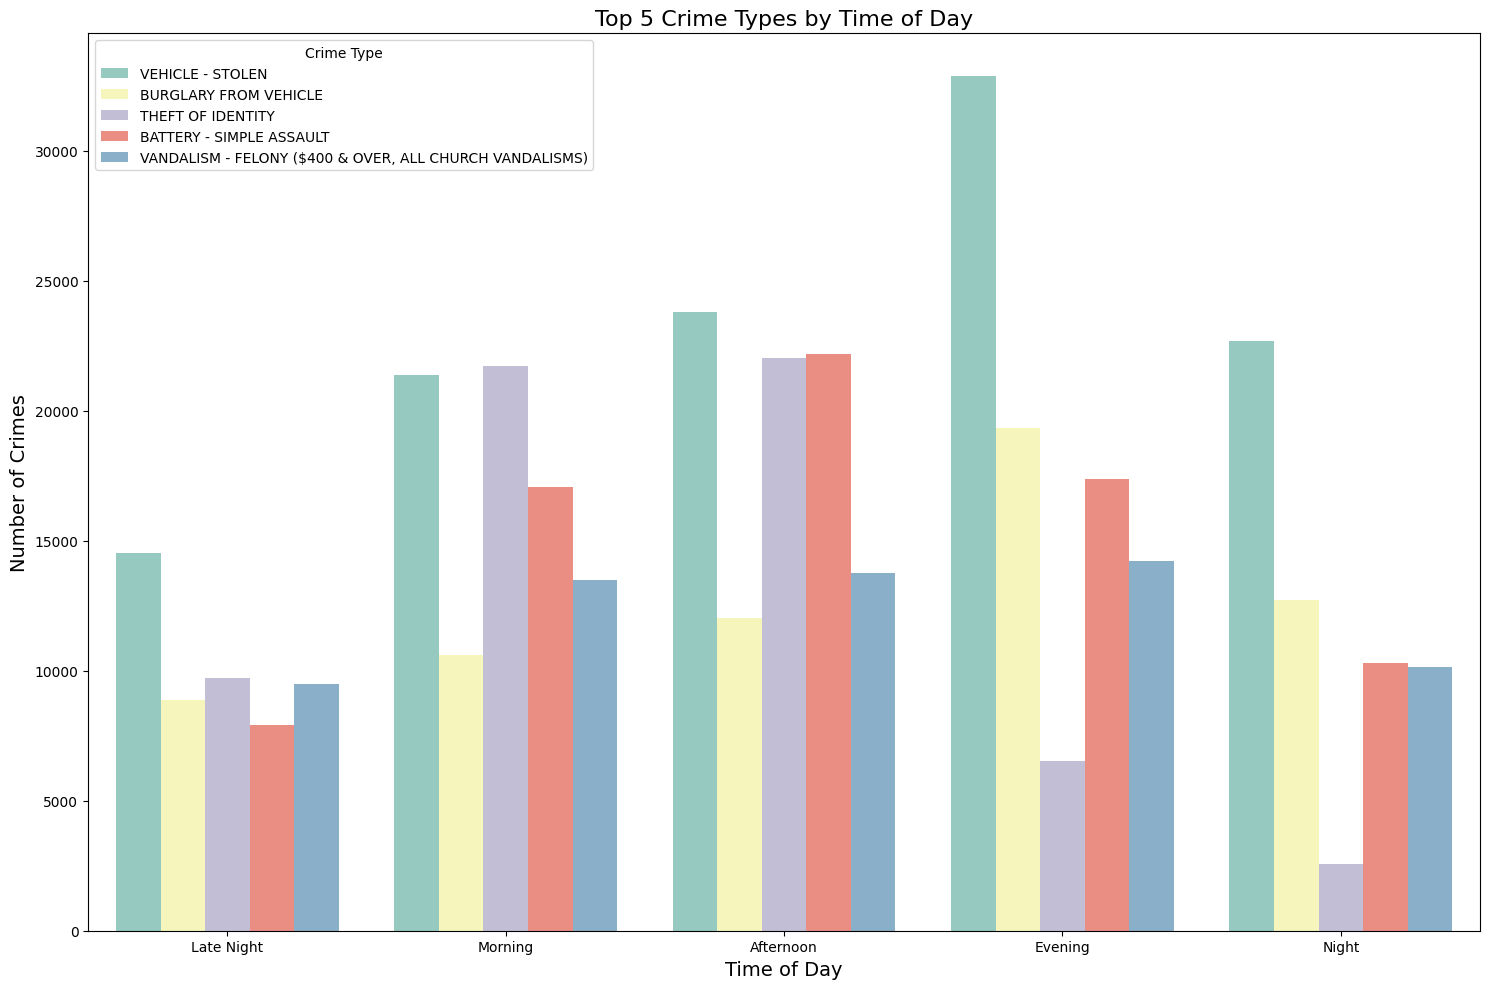

In [26]:
# Filter top 5 crime types and create a copy
filtered_df = crime_data_pd[crime_data_pd['Crm Cd Desc'].isin(top_crimes)].copy()

# Extract hour from TIME OCC
filtered_df.loc[:, 'Hour'] = filtered_df['TIME OCC'].astype(int) // 100

# Function to map hour to time-of-day bucket
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

# Apply time period mapping
filtered_df.loc[:, 'TimeOfDay'] = filtered_df['Hour'].apply(get_time_period)

# Define display order for time periods
time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']

# Plot count of crimes by time of day and crime type
plt.figure(figsize=(15, 10))
sns.countplot(
    x='TimeOfDay',
    hue='Crm Cd Desc',
    data=filtered_df,
    order=time_order,
    palette='Set3'
)

# Finalize plot formatting
plt.title('Top 5 Crime Types by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Crime Location Map with Marker Clustering</b> <br>
<span style="font-size:17px">This cell uses Folium to display 5,000 crime incidents on an interactive map of Los Angeles. Clustered markers are added to show crime locations, with popups indicating the type of crime. The map provides a clear view of spatial crime distribution across the city.</span></span>

In [46]:
import folium
from folium.plugins import MarkerCluster

# Filter and sample for map rendering (avoid loading thousands of points)
location_pd = df.select("LAT", "LON", "`Crm Cd Desc`").dropna().limit(5000).toPandas()

# Create base map centered on LA
m = folium.Map(location=[34.05, -118.25], zoom_start=11)

# Clustered markers
marker_cluster = MarkerCluster().add_to(m)
for _, row in location_pd.iterrows():
    folium.Marker(
        location=[row["LAT"], row["LON"]],
        popup=row["Crm Cd Desc"]
    ).add_to(marker_cluster)
# Display map
m   

<span style="font-size:20px"><b>Victim Age Distribution</b> <br>
<span style="font-size:17px">This cell filters out invalid or unrealistic victim ages and plots a histogram of valid ages between 1 and 99. The distribution is visualized using Matplotlib to understand which age groups are most commonly involved in crime reports.</span></span>

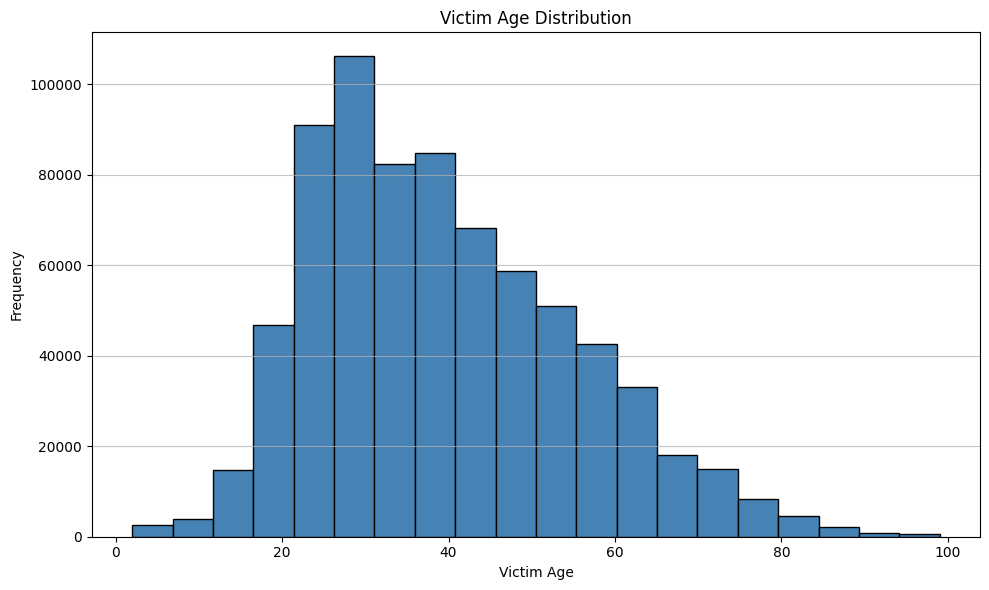

In [48]:
# Filter and convert to Pandas (if not already done)
from pyspark.sql.functions import col
age_df = df.filter((col("`Vict Age`").isNotNull()) & (col("`Vict Age`") > 0) & (col("`Vict Age`") < 100))
age_pd = age_df.select(col("`Vict Age`").cast("int")).toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(age_pd["Vict Age"], bins=20, color='steelblue', edgecolor='black')

plt.title("Victim Age Distribution")
plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


<span style="font-size:17px">Create age buckets and count for victim age distribution as bar graph</span>

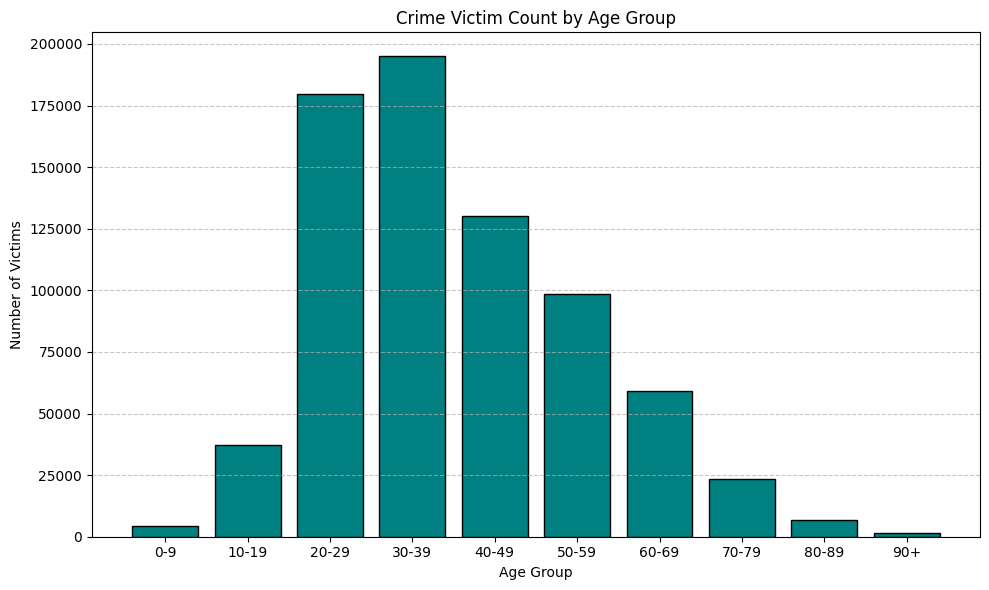

In [49]:
# Filter and prepare the data
from pyspark.sql.functions import when, col
age_df = df.filter((col("`Vict Age`").isNotNull()) & (col("`Vict Age`") > 0) & (col("`Vict Age`") < 100))

# Create age groups
age_df = age_df.withColumn(
    "age_group",
    when(col("`Vict Age`") < 10, "0-9")
    .when(col("`Vict Age`") < 20, "10-19")
    .when(col("`Vict Age`") < 30, "20-29")
    .when(col("`Vict Age`") < 40, "30-39")
    .when(col("`Vict Age`") < 50, "40-49")
    .when(col("`Vict Age`") < 60, "50-59")
    .when(col("`Vict Age`") < 70, "60-69")
    .when(col("`Vict Age`") < 80, "70-79")
    .when(col("`Vict Age`") < 90, "80-89")
    .otherwise("90+")
)

# Group and convert to pandas
age_group_counts = age_df.groupBy("age_group").count().orderBy("age_group")
age_group_pd = age_group_counts.toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(age_group_pd["age_group"], age_group_pd["count"], color='teal', edgecolor='black')

plt.title("Crime Victim Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Crimes by Victim Descent</b> <br>
<span style="font-size:17px">This cell groups crime data by the victim's reported descent code and visualizes the number of incidents for each group using a bar chart. It provides insight into how different descent categories appear in the dataset.</span></span>

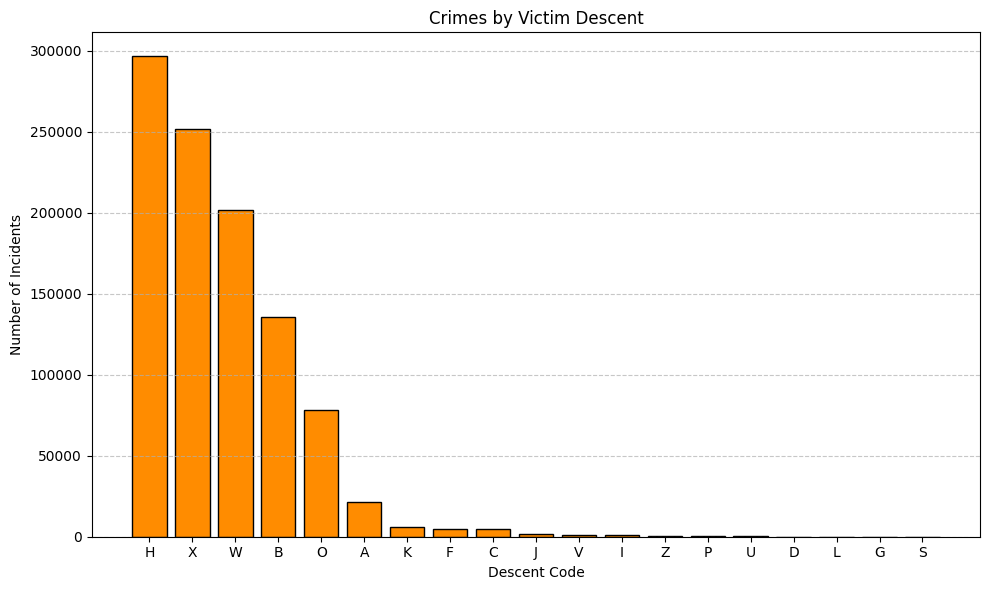

In [50]:
# Group and convert to pandas
descent_pd = df.groupBy("`Vict Descent`").count().orderBy("count", ascending=False).toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(descent_pd["Vict Descent"], descent_pd["count"], color='darkorange', edgecolor='black')

plt.title("Crimes by Victim Descent")
plt.xlabel("Descent Code")
plt.ylabel("Number of Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Crimes by Victim Gender</b> <br>
<span style="font-size:17px">This cell groups the dataset by victim gender and counts the number of crime incidents for each category. A bar chart is used to visualize the gender distribution of crime victims.</span></span>

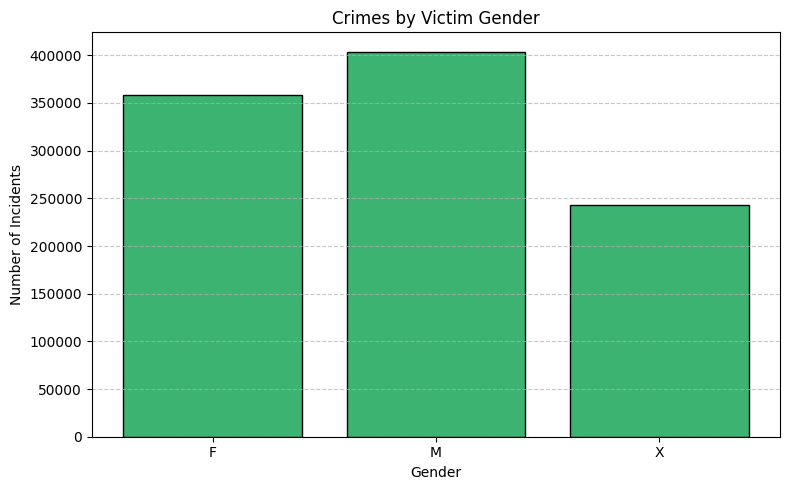

In [51]:
# Group and convert to pandas
gender_pd = df.groupBy("`Vict Sex`").count().toPandas()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(gender_pd["Vict Sex"], gender_pd["count"], color='mediumseagreen', edgecolor='black')

plt.title("Crimes by Victim Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


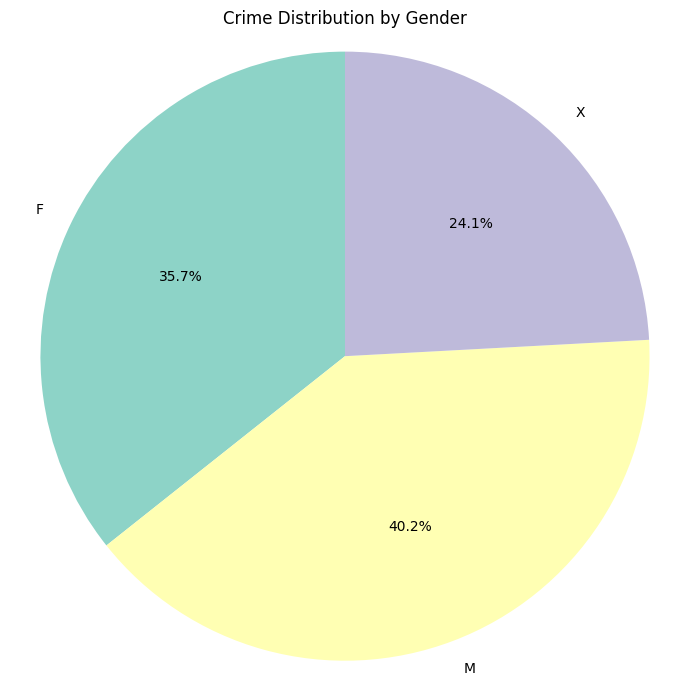

In [52]:
# Crimes by victim gender (pie chart)
plt.figure(figsize=(7, 7))
plt.pie(gender_pd["count"],
        labels=gender_pd["Vict Sex"],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors)

plt.title("Crime Distribution by Gender")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Victim Age Distribution by Gender (Stacked Bar Chart)</b> <br>
<span style="font-size:17px">This cell groups the data by age group and victim gender, then visualizes the counts using a stacked bar chart. It shows how different age categories contribute to the overall distribution of male, female, and other gender-reported victims.</span></span>

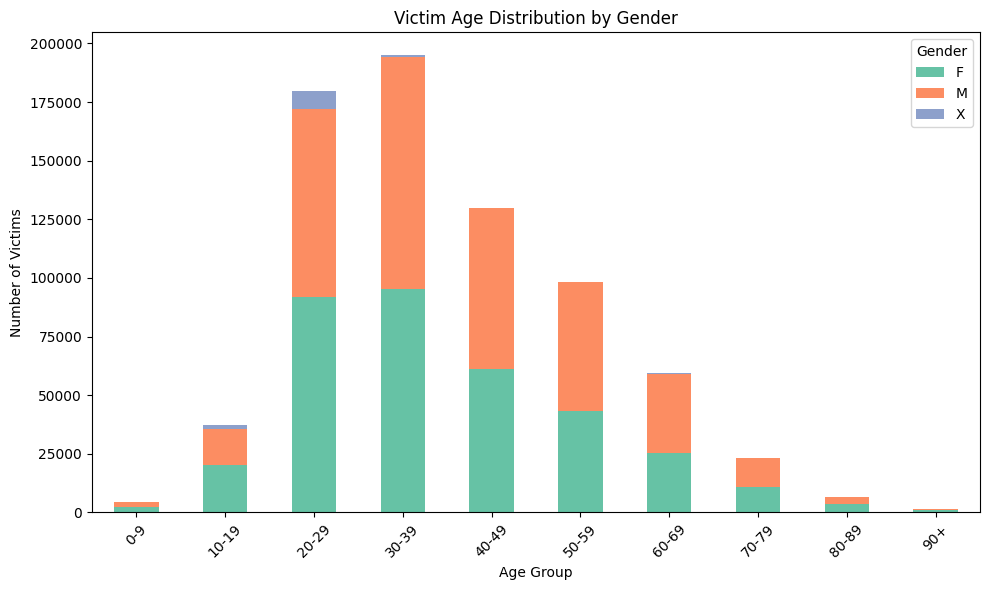

In [55]:
from pyspark.sql.functions import col, when

# Step 1: Filter and bucket victim ages into age groups
age_df = df.filter((col("`Vict Age`").isNotNull()) & (col("`Vict Age`") > 0) & (col("`Vict Age`") < 100))
age_df = age_df.withColumn(
    "age_group",
    when(col("`Vict Age`") < 10, "0-9")
    .when(col("`Vict Age`") < 20, "10-19")
    .when(col("`Vict Age`") < 30, "20-29")
    .when(col("`Vict Age`") < 40, "30-39")
    .when(col("`Vict Age`") < 50, "40-49")
    .when(col("`Vict Age`") < 60, "50-59")
    .when(col("`Vict Age`") < 70, "60-69")
    .when(col("`Vict Age`") < 80, "70-79")
    .when(col("`Vict Age`") < 90, "80-89")
    .otherwise("90+")
)

# Step 2: Group by age_group and gender, then convert to Pandas
age_gender_counts = age_df.groupBy("age_group", "`Vict Sex`") \
    .count().orderBy("age_group", "`Vict Sex`")

age_gender_pd = age_gender_counts.toPandas()

# Step 3: Pivot and plot using matplotlib
pivot_df = age_gender_pd.pivot(index="age_group", columns="Vict Sex", values="count").fillna(0)

pivot_df.plot(kind='bar',
              stacked=True,
              figsize=(10, 6),
              color=plt.cm.Set2.colors)

plt.title("Victim Age Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Crime Trends During U.S. Presidential Election Periods (2020 & 2024)</b> <br>
<span style="font-size:17px">The following visualizations analyze daily crime counts during two major U.S. election periods: **October 2020 to February 2021** and **October 2024 to February 2025**. Key political milestones—such as the start of the election period, formal voting by the Electoral College, certification of results by Congress, and the presidential inauguration—are marked with red dashed lines.

These charts help explore potential shifts or spikes in crime activity around significant political events, offering insight into how major national moments may influence public behavior and safety patterns.</span></span>

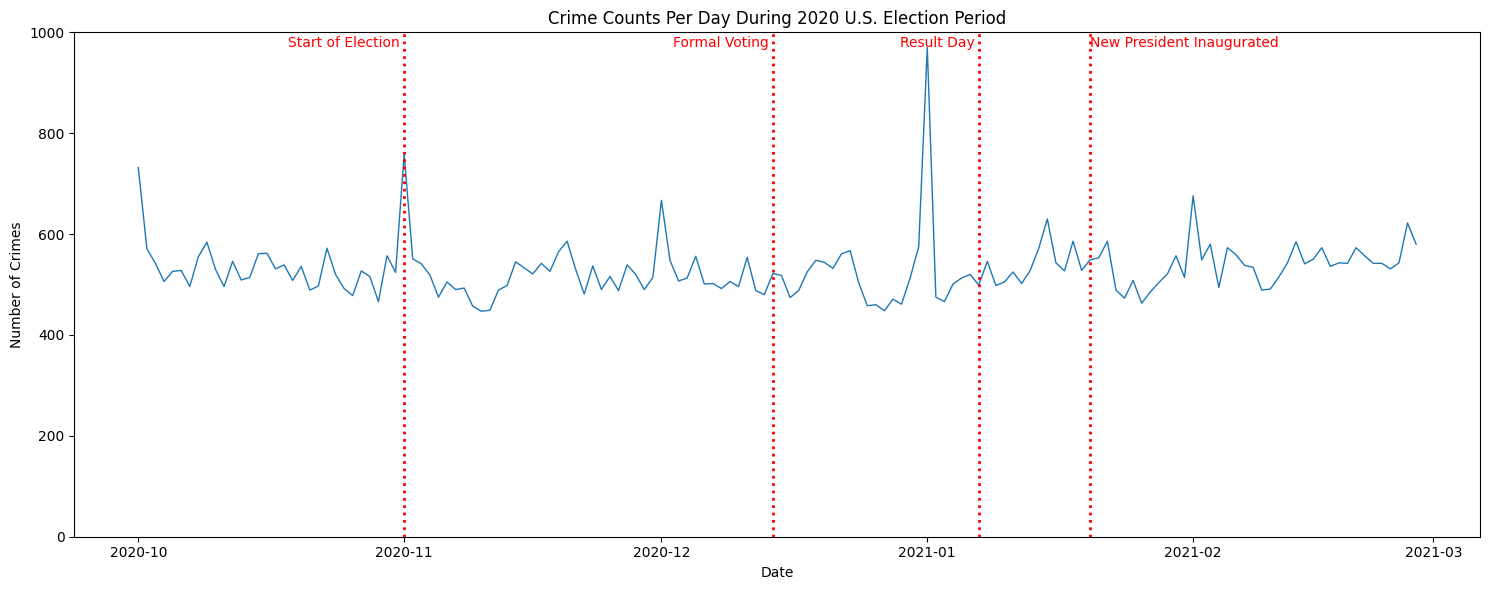

In [30]:

# Convert from Spark DataFrame
crime_data = df.select("DATE OCC", "TIME OCC").toPandas()

# Prepare datetime column
crime_data['TIME OCC'] = crime_data['TIME OCC'].apply(lambda x: f"{int(x):04d}")
crime_data['Date Time OCC'] = pd.to_datetime(
    crime_data['DATE OCC'].astype(str) + ' ' +
    crime_data['TIME OCC'].str[:2] + ':' + crime_data['TIME OCC'].str[2:]
)

# Filter for 2020 US election period
election_2020 = crime_data[
    (crime_data['Date Time OCC'] >= '2020-10-01') & (crime_data['Date Time OCC'] < '2021-02-28')
]

# Daily crime counts
election_2020_count = election_2020['Date Time OCC'].dt.date.value_counts().sort_index()

# Plot
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(election_2020_count, linestyle='-', linewidth=1)

ax.set_title('Crime Counts Per Day During 2020 U.S. Election Period')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_ylim(bottom=0, top=1000)

# Mark key dates
election_start = pd.to_datetime('2020-11-01')
formal_voting = pd.to_datetime('2020-12-14')
result_day = pd.to_datetime('2021-01-07')
inauguration_day = pd.to_datetime('2021-01-20')

ax.axvline(x=election_start, color='red', linestyle=':', linewidth=2)
ax.axvline(x=formal_voting, color='red', linestyle=':', linewidth=2)
ax.axvline(x=result_day, color='red', linestyle=':', linewidth=2)
ax.axvline(x=inauguration_day, color='red', linestyle=':', linewidth=2)

ax.annotate('Start of Election ', xy=(election_start, 950), xytext=(election_start, 970),
             ha='right', color='red')
ax.annotate('Formal Voting ', xy=(formal_voting, 950), xytext=(formal_voting, 970),
             ha='right', color='red')
ax.annotate('Result Day ', xy=(result_day, 950), xytext=(result_day, 970),
             ha='right', color='red')
ax.annotate('New President Inaugurated', xy=(inauguration_day, 950), xytext=(inauguration_day, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()


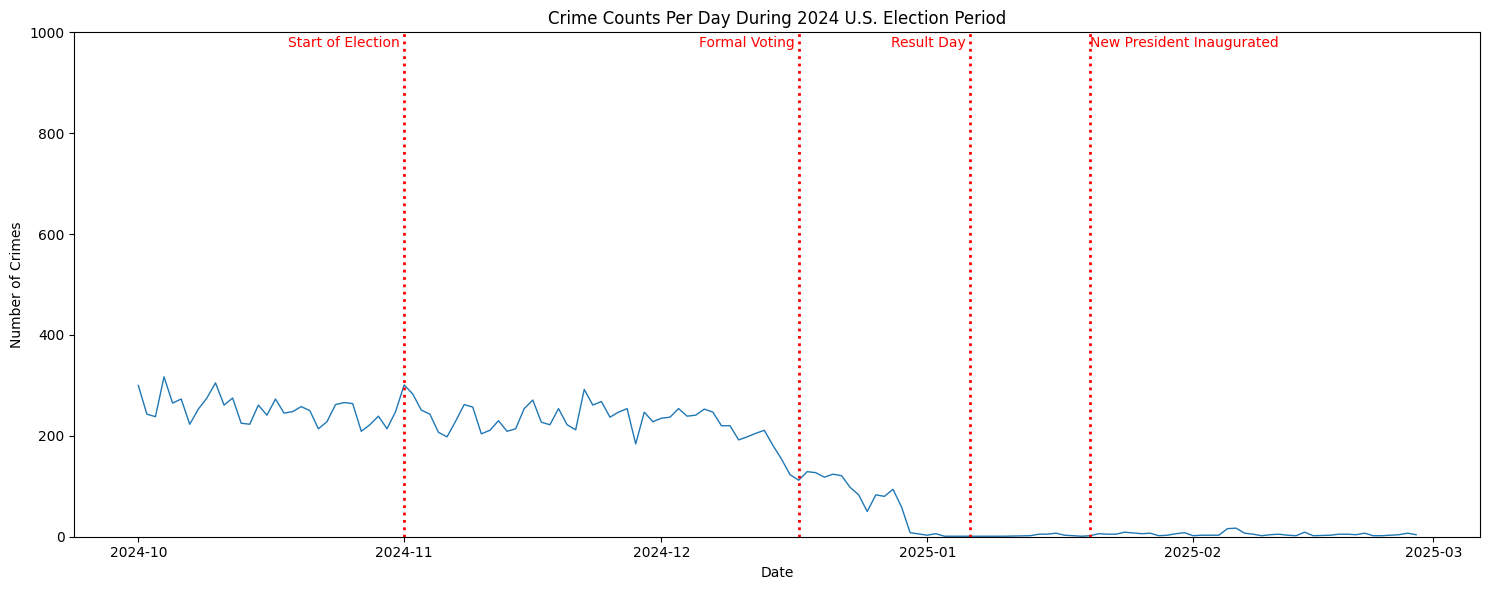

In [31]:
# Filter for 2024 US election period
election_2024 = crime_data[
    (crime_data['Date Time OCC'] >= '2024-10-01') & (crime_data['Date Time OCC'] < '2025-02-28')
]

# Daily crime counts
election_2024_count = election_2024['Date Time OCC'].dt.date.value_counts().sort_index()

# Plot
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(election_2024_count, linestyle='-', linewidth=1)

ax.set_title('Crime Counts Per Day During 2024 U.S. Election Period')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_ylim(bottom=0, top=1000)

# Mark key dates
election_start = pd.to_datetime('2024-11-01')
formal_voting = pd.to_datetime('2024-12-17')
result_day = pd.to_datetime('2025-01-06')
inauguration_day = pd.to_datetime('2025-01-20')

ax.axvline(x=election_start, color='red', linestyle=':', linewidth=2)
ax.axvline(x=formal_voting, color='red', linestyle=':', linewidth=2)
ax.axvline(x=result_day, color='red', linestyle=':', linewidth=2)
ax.axvline(x=inauguration_day, color='red', linestyle=':', linewidth=2)

ax.annotate('Start of Election ', xy=(election_start, 950), xytext=(election_start, 970),
             ha='right', color='red')
ax.annotate('Formal Voting ', xy=(formal_voting, 950), xytext=(formal_voting, 970),
             ha='right', color='red')
ax.annotate('Result Day ', xy=(result_day, 950), xytext=(result_day, 970),
             ha='right', color='red')
ax.annotate('New President Inaugurated', xy=(inauguration_day, 950), xytext=(inauguration_day, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Crime Trends During George Floyd Protests (2020)</b> <br>
<span style="font-size:17px">This chart displays daily crime counts in Los Angeles from April to July 2020, during the period surrounding the George Floyd protests. Key dates are marked with red dashed lines:<br>
- **May 25, 2020**: George Floyd’s death<br>
- **May 27, 2020**: Protests began in many U.S. cities<br>
- **June 7, 2020**: Peak protest activity concluded<br>

This visualization helps examine whether large-scale civil unrest had a noticeable effect on crime reporting during that period.</span></span>

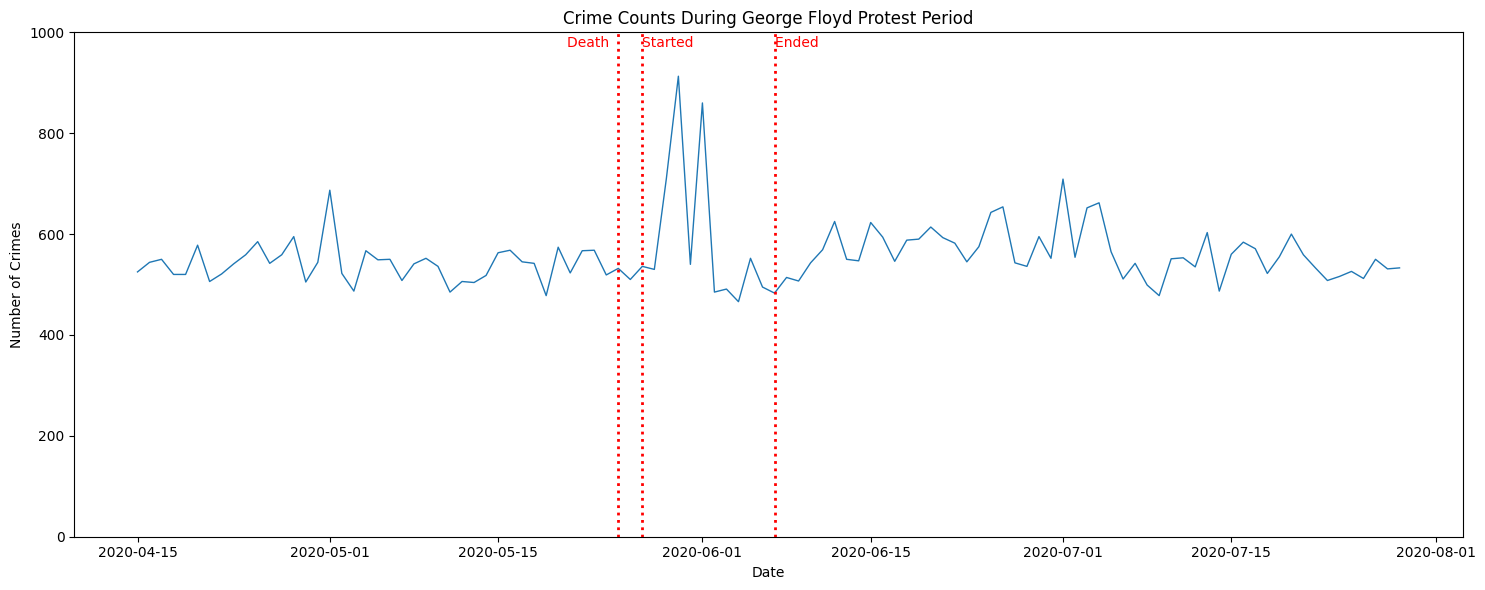

In [33]:

# Convert Spark DataFrame to Pandas
crime_data = df.select("DATE OCC", "TIME OCC").toPandas()

# Create datetime column
crime_data['TIME OCC'] = crime_data['TIME OCC'].apply(lambda x: f"{int(x):04d}")
crime_data['Date Time OCC'] = pd.to_datetime(
    crime_data['DATE OCC'].astype(str) + ' ' +
    crime_data['TIME OCC'].str[:2] + ':' + crime_data['TIME OCC'].str[2:]
)

# Filter for George Floyd protest period
George_Floyd_Protests = crime_data[
    (crime_data['Date Time OCC'] >= '2020-04-15') & 
    (crime_data['Date Time OCC'] < '2020-07-30')
]

# Daily crime counts
George_Floyd_Protests = George_Floyd_Protests.copy()
George_Floyd_Protests['Date Time OCC'] = pd.to_datetime(George_Floyd_Protests['Date Time OCC'])
George_Floyd_Protests_count = George_Floyd_Protests['Date Time OCC'].dt.date.value_counts().sort_index()

# Plotting
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(George_Floyd_Protests_count, linestyle='-', linewidth=1)

ax.set_title('Crime Counts During George Floyd Protest Period')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_ylim(bottom=0, top=1000)

# Key protest-related dates
Death = pd.to_datetime('2020-05-25')
Protests_started = pd.to_datetime('2020-05-27')
Protests_ended = pd.to_datetime('2020-06-07')

ax.axvline(x=Death, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_started, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_ended, color='red', linestyle=':', linewidth=2)

ax.annotate('Death  ', xy=(Death, 950), xytext=(Death, 970),
             ha='right', color='red')
ax.annotate('Started ', xy=(Protests_started, 950), xytext=(Protests_started, 970),
             ha='left', color='red')
ax.annotate('Ended ', xy=(Protests_ended, 950), xytext=(Protests_ended, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()


<span style="font-size:20px"><b>Crime Trends During COVID-19 Pandemic (2020–2022)</b> <br>
<span style="font-size:17px">This visualization shows daily crime counts in Los Angeles from January 2020 to June 2022, covering the three major waves of the COVID-19 pandemic. Each wave is marked with vertical lines and annotated above the chart to show their approximate start and end dates:<br>

- **First Wave**: March 1 – August 1, 2020<br>
- **Second Wave**: June 30 – October 26, 2021<br>
- **Third Wave**: January 5 – April 25, 2022<br>

The plot allows for an examination of how public health measures (e.g., lockdowns, mobility restrictions) and broader societal impacts of the pandemic may have influenced trends in reported crime.</span></span>

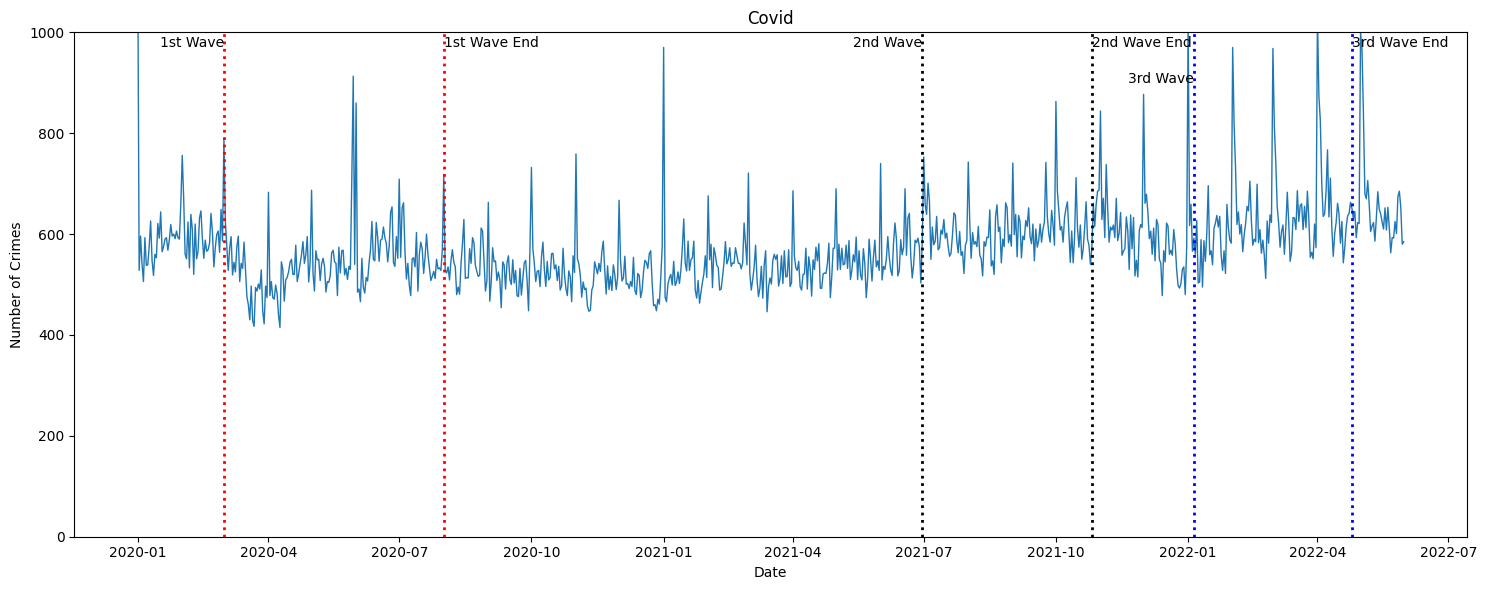

In [44]:
# Convert from Spark DataFrame
crime_data = df.select("DATE OCC", "TIME OCC").toPandas()

# Create combined datetime column
crime_data['TIME OCC'] = crime_data['TIME OCC'].apply(lambda x: f"{int(x):04d}")
crime_data['Date Time OCC'] = pd.to_datetime(
    crime_data['DATE OCC'].astype(str) + ' ' +
    crime_data['TIME OCC'].str[:2] + ':' + crime_data['TIME OCC'].str[2:]
)

# Filter for COVID period and copy
Covid = crime_data[
    (crime_data['Date Time OCC'] >= '2020-01-01') &
    (crime_data['Date Time OCC'] < '2022-06-01')
].copy()

# Convert datetime column (safe assignment)
Covid['Date Time OCC'] = pd.to_datetime(Covid['Date Time OCC'])

# Daily crime counts
Covid_count = Covid['Date Time OCC'].dt.date.value_counts().sort_index()

# Plotting
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(Covid_count, linestyle='-', linewidth=1)

ax.set_title('Covid')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_ylim(bottom=0, top=1000)

# Key wave periods
First_wave = pd.to_datetime('2020-03-01')
FirstWave_ended = pd.to_datetime('2020-08-01')
Second_wave = pd.to_datetime('2021-06-30')
Secondwave_ended = pd.to_datetime('2021-10-26')
Third_wave = pd.to_datetime('2022-01-05')
Thirdwave_ended = pd.to_datetime('2022-04-25')

# Add vertical lines
ax.axvline(x=First_wave, color='red', linestyle=':', linewidth=2)
ax.axvline(x=FirstWave_ended, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Second_wave, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Secondwave_ended, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Third_wave, color='blue', linestyle=':', linewidth=2)
ax.axvline(x=Thirdwave_ended, color='blue', linestyle=':', linewidth=2)

# Add annotations
ax.annotate('1st Wave', xy=(First_wave, 950), xytext=(First_wave, 970),
             ha='right', color='black')
ax.annotate('1st Wave End', xy=(FirstWave_ended, 950), xytext=(FirstWave_ended, 970),
             ha='left', color='black')
ax.annotate('2nd Wave', xy=(Second_wave, 950), xytext=(Second_wave, 970),
             ha='right', color='black')
ax.annotate('2nd Wave End', xy=(Secondwave_ended, 950), xytext=(Secondwave_ended, 970),
             ha='left', color='black')
ax.annotate('3rd Wave', xy=(Third_wave, 950), xytext=(Third_wave, 900),
             ha='right', color='black')
ax.annotate('3rd Wave End', xy=(Thirdwave_ended, 950), xytext=(Thirdwave_ended, 970),
             ha='left', color='black')
plt.tight_layout()
plt.show()
